In [3]:
import vitaldb
import numpy as np
import pandas as pd
import os, pickle, time
import matplotlib.pyplot as plt


# define variables
SRATE = 100

# 1. Vital files to numpy (TIVA cases)
Patients : TIVA - general ane_type
TIVA : 2326 out of 6388
general ane_type : 

In [31]:
# tracks to extract / VENT_SET_TV -> VENT_INSP_TM, SET_INSP_TM
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE"]


# create saving folder
file_path = "./vital_np"
if not os.path.exists(file_path):
    os.mkdir(file_path)


# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")

# target patients' caseids
caseids = list(vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))


cnt = 0
for caseid in caseids:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}')
    
    # check if file is already existing
    filename = f'{file_path}/{caseid}.npz'
    if os.path.isfile(filename):
        continue
    
    
    # get vital file and save as numpy
    vf = vitaldb.VitalFile(caseid, track_names)
    vals = vf.to_numpy(track_names, interval=1/SRATE)

    
    # saving files
    if not np.mean(~np.isnan(vals[:,2])):
        if not np.mean(~np.isnan(vals[:,3])):
            print(f'caseid {caseid} - no valid data for insp_tm')
        np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,3], PPF=vals[:,4], RFTN=vals[:,5])
    else:
        np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,2], PPF=vals[:,4], RFTN=vals[:,5])
    

1/2699
2/2699
3/2699
4/2699
5/2699
6/2699
7/2699
8/2699
caseid 1095 - no valid data for insp_tm
9/2699
10/2699
11/2699
12/2699
13/2699
14/2699
15/2699
16/2699
17/2699
18/2699
caseid 1728 - no valid data for insp_tm
19/2699
20/2699
21/2699
22/2699
23/2699
24/2699
25/2699
26/2699
27/2699
28/2699
29/2699
30/2699
31/2699
32/2699
caseid 2411 - no valid data for insp_tm
33/2699
34/2699
caseid 2464 - no valid data for insp_tm
35/2699
36/2699
37/2699
38/2699
39/2699
40/2699
caseid 2733 - no valid data for insp_tm
41/2699
42/2699
43/2699
44/2699
45/2699
46/2699
47/2699
48/2699
49/2699
50/2699
51/2699
52/2699
53/2699
54/2699
55/2699
56/2699
caseid 3569 - no valid data for insp_tm
57/2699
58/2699
caseid 3759 - no valid data for insp_tm
59/2699
60/2699
61/2699
62/2699
63/2699
64/2699
65/2699
caseid 4200 - no valid data for insp_tm
66/2699
67/2699
caseid 4261 - no valid data for insp_tm
68/2699
69/2699
70/2699
71/2699
caseid 4623 - no valid data for insp_tm
72/2699
73/2699
74/2699
75/2699
76/2699
7

In [107]:
## manually saving
file_path = "vital_np"
caseid = 13
filename = f'{file_path}/{caseid}.npz'

# get vital file and save as numpy
vf = vitaldb.VitalFile(caseid, track_names)
vals = vf.to_numpy(track_names, interval=1/SRATE)

if not np.mean(~np.isnan(vals[:,2])):
    if not np.mean(~np.isnan(vals[:,3])):
        print(f'caseid {caseid} - no valid data for insp_tm')
    np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,3], PPF=vals[:,4], RFTN=vals[:,5])
else:
    np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,2], PPF=vals[:,4], RFTN=vals[:,5])

In [21]:
# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")

# target patients' caseids
caseids = vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid'])

# c_insp : vent_sinp_tm이 empty인 caseids
set(caseids) & set(c_insp)

{783,
 904,
 1095,
 1120,
 1157,
 1728,
 1757,
 2016,
 2185,
 2231,
 2252,
 2326,
 2411,
 2453,
 2464,
 2733,
 3200,
 3270,
 3291,
 3311,
 3537,
 3569,
 3759,
 4200,
 4258,
 4261,
 4373,
 4510,
 4623,
 4652,
 4886,
 4959,
 5083,
 5289,
 5329,
 5330,
 5490,
 5682,
 5687,
 5696,
 6285}

* revised version - 500Hz (221115)

In [ ]:
SRATE = 500
LEN_PER_POST = 60
file_path = f'vital_to_np_pd_{SRATE}Hz'

print('loading vital data...')
start = time.time()

# tracks to extract / VENT_SET_TV -> VENT_INSP_TM, SET_INSP_TM
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE", "Solar8000/NIBP_MBP", "Solar8000/ART_MBP", "Solar8000/HR", "Solar8000/ETCO2"]

# create saving folder
#file_path = "vital_to_np"
if not os.path.exists(file_path):
    os.mkdir(file_path)

# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")

# target patients' caseids
caseids = list(vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))


cnt = 0
non_intu, non_mbp, non_hr, non_rftn, emptyCO2 = [], [], [], [], []
for caseid in caseids:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}({caseid})', end='...')

    # check if file is already existing
    filename = f'{file_path}/{caseid}.npz'
    if os.path.isfile(filename):
        print('already existing')
        continue


    # get vital file and save as numpy
    vf = vitaldb.VitalFile(caseid, track_names)
    vals = vf.to_numpy(track_names, interval=1/SRATE)

    # intubation time - find the first t which satisfies vent_set_tm != nan & ppf_ce != nan
    t_intu = np.where(~np.isnan(vals[:,5]))[0][0]

    if not np.mean(~np.isnan(vals[:,2])):
        if not np.mean(~np.isnan(vals[:,3])):
            print(f'no valid data for insp_tm')

        intu = vals[:,3]
        intv = 850 *(SRATE/100)  # maximum interval for "Primus/SET_INSP_TM"
    else:
        intu = vals[:,2]
        intv = 250 *(SRATE/100)  # maximum interval for "Solar8000/VENT_INSP_TM"

    idc_intu = np.where(~np.isnan(intu))[0]
    while True:
        if t_intu >= len(vals[:,0]):
            non_intu.append(caseid)
            print('no valid intubation time')
            break

        # vent_insp_tm이 nan이 아닌 경우
        if not np.isnan(intu[t_intu]):
            idx = np.where(idc_intu==t_intu)[0][0]
            if idx + 10*(SRATE/100) >= len(idc_intu):
                non_intu.append(caseid)
                print('...no valid intubation time')
                break                
            prev = t_intu

            # 모여있는 vent_insp_tm 길이 계산
            switch = True
            for i in range(1,11):
                if idc_intu[idx+i] - prev > intv:
                    switch = False
                prev = idc_intu[idx+i]

            if switch:
                break
                # 초반에 vent_insp_tm이 예외적으로 측정된 경우 제외    
                # if abs(t_intu-t_etco2) < 5.5*60*SRATE:
                #    break
                # else:
                #    t_intu += 1
            else:
                t_intu += 1
        else:
            t_intu += 1

    # No valid data for input
    if t_intu - SRATE * 120 < 0:
        print('no data from intubation - 120s')
        continue        
    
    
    # MBP value
    if not np.mean(~np.isnan(vals[:,6])):
        if not np.mean(~np.isnan(vals[:,7])):
            non_mbp.append(caseid)
            print(f'no valid data for MBP')
    nibp = vals[:,6]
    art = vals[:,7]
    mbp = np.array([art[i] if art[i]>30 else nibp[i] for i in range(len(nibp))])

    # HR
    if not np.mean(~np.isnan(vals[:,8])):
        non_hr.append(caseid)
        print('no valid data for HR')
    hr = vals[:,8]
    
    if not np.mean(~np.isnan(vals[:,5])):
        non_rftn.append(caseid)
        print('no valid data for rftn')

        
    # non-event data : extract vital from previous 120s-60s from intubation
    ppg = vals[:,1]
    prev_ppg = ppg[t_intu - SRATE*120:t_intu - SRATE*60]

    ecg = vals[:,0]
    prev_ecg = ecg[t_intu - SRATE*120:t_intu - SRATE*60]

    nppf = vals[:,4]
    nppf = nppf[t_intu - SRATE*120:t_intu - SRATE*60]

    nrftn = vals[:,5]
    nrftn = nrftn[t_intu - SRATE*120:t_intu - SRATE*60]

    nmbp = mbp[t_intu - SRATE*120:t_intu - SRATE*60]
    nhr = hr[t_intu - SRATE*120:t_intu - SRATE*60]

    
    # after intubation, pain calculated using TSS, CISA
    post_ppg = ppg[t_intu:t_intu + SRATE*LEN_PER_POST]
    post_ecg = ecg[t_intu:t_intu + SRATE*LEN_PER_POST]

    ppf = vals[:,4]
    ppf = ppf[t_intu:t_intu + SRATE*LEN_PER_POST]

    rftn = vals[:,5]
    rftn = rftn[t_intu:t_intu + SRATE*LEN_PER_POST]

    embp = mbp[t_intu:t_intu + SRATE*LEN_PER_POST]
    ehr = hr[t_intu:t_intu + SRATE*LEN_PER_POST]
    
    np.savez(filename, nECG=prev_ecg, nPPG=prev_ppg, ECG=post_ecg, PPG=post_ppg, nPPF = nppf, nRFTN = nrftn, PPF=ppf, RFTN=rftn, nMBP=nmbp, MBP=embp, nHR=nhr, HR=ehr)
    print('  completed')


end = time.time()
f = open(f'{file_path}/README.txt', 'w')
f.write(f'no valid intubation time: {non_intu}\n')
f.write(f'no valid MBP: {non_mbp}\n')
f.write(f'no valid HR: {non_hr}\n')
f.write(f'no valid RFTN: {non_rftn}\n')
#f.write(f'empty ETCO2: {emptyCO2}\n')
f.write(f'total time: {end-start:.2f} sec')
f.close()

loading vital data...
1/2699(3)...  completed
2/2699(8)...no data from intubation - 120s
3/2699(9)...  completed
4/2699(13)...  completed
5/2699(14)...  completed
6/2699(16)...  completed
7/2699(17)...  completed
8/2699(19)...  completed
9/2699(20)...  completed
10/2699(22)...  completed
11/2699(28)...  completed
12/2699(29)...  completed
13/2699(30)...  completed
14/2699(35)...  completed
15/2699(36)...  completed
16/2699(40)...  completed
17/2699(42)...  completed
18/2699(44)...  completed
19/2699(45)...  completed
20/2699(46)...  completed
21/2699(47)...  completed
22/2699(48)...  completed
23/2699(50)...  completed
24/2699(54)...  completed
25/2699(57)...  completed
26/2699(59)...  completed
27/2699(67)...  completed
28/2699(69)...  completed
29/2699(70)...  completed
30/2699(72)...  completed
31/2699(74)...  completed
32/2699(75)...  completed
33/2699(77)...  completed
34/2699(78)...  completed
35/2699(83)...  completed
36/2699(88)...  completed
37/2699(93)...  completed
38/2699(1

# 2. Input 60s from vital data

In [109]:
# create saving folder
file_path = "vital_np"
save_path = "input_60s"
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
    
# target patients' caseids; discarded 15 cases which don't have the index to guess intubation time 
df = pd.read_csv("https://api.vitaldb.net/cases")
caseids = (vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))
caseids = list(caseids - {1095, 1728, 2411, 2464, 2733, 3569, 3759, 4200, 4261, 4623, 4886, 5289, 5329, 5696, 6285})
    

cnt = 0
for caseid in caseids[:]:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}')
    vals = np.load(f'{file_path}/{caseid}.npz')
    
    
    filename = f'{save_path}/{caseid}.npz'
    if os.path.isfile(filename):
        continue
    
    
    # intubation time - find the first t which satisfies vent_set_tm != nan & ppf_ce != nan
    t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]

    intu = vals['INTU']
    idc_intu = np.where(~np.isnan(intu))[0]
    while True:
        # vent_insp_tm이 nan이 아닌 경우
        if not np.isnan(intu[t_intu]):
            print(t_intu)
            idx = np.where(idc_intu==t_intu)[0][0]
            prev = t_intu

            switch = True
            for i in range(1,16):
                if idc_intu[idx+i] - prev > 210:
                    switch = False
                    t_intu = t_intu + 1
                prev = idc_intu[idx+i]

            if switch:
                break

        else:
            t_intu = t_intu + 1
    
    
    # non-event data : extract vital from previous 120s-60s from intubation
    ppg = vals['PPG']
    prev_ppg = ppg[t_intu - SRATE*120:t_intu - SRATE*60]
    
    ecg = vals['ECG']
    prev_ecg = ecg[t_intu - SRATE*120:t_intu - SRATE*60]
    
    
    # after intubation, pain calculated using TSS, CISA
    post_ppg = ppg[t_intu:t_intu + SRATE*60]
    post_ecg = ecg[t_intu:t_intu + SRATE*60]
    
    ppf = vals['PPF']
    ppf = ppf[t_intu:t_intu + SRATE*60]
    
    rftn = vals['RFTN']
    rftn = rftn[t_intu:t_intu + SRATE*60]
    
    
    # saving files
    #filename = f'{save_path}/{caseid}.npz'
    np.savez(filename, nECG=prev_ecg, nPPG=prev_ppg, ECG=post_ecg, PPG=post_ppg, PPF=ppf, RFTN=rftn)

1/2684
2/2684
3/2684
4/2684
5/2684
6/2684
7/2684
8/2684
9/2684
10/2684
11/2684
12/2684
13/2684
14/2684
15/2684
16/2684
17/2684
18/2684
19/2684
20/2684
21/2684
22/2684
23/2684
24/2684
25/2684
26/2684
27/2684
28/2684
29/2684
30/2684
31/2684
32/2684
33/2684
34/2684
35/2684
36/2684
37/2684
38/2684
39/2684
40/2684
41/2684
42/2684
43/2684
44/2684
45/2684
46/2684
47/2684
48/2684
49/2684
50/2684
51/2684
52/2684
53/2684
54/2684
55/2684
56/2684
57/2684
58/2684
59/2684
60/2684
61/2684
62/2684
63/2684
64/2684
65/2684
66/2684
67/2684
68/2684
69/2684
70/2684
71/2684
72/2684
73/2684
74/2684
75/2684
76/2684
77/2684
78/2684
79/2684
80/2684
81/2684
82/2684
83/2684
84/2684
85/2684
86/2684
87/2684
88/2684
89/2684
90/2684
91/2684
92/2684
93/2684
94/2684
95/2684
96/2684
97/2684
98/2684
99/2684
100/2684
101/2684
102/2684
103/2684
104/2684
105/2684
106/2684
107/2684
108/2684
109/2684
110/2684
111/2684
112/2684
113/2684
114/2684
115/2684
116/2684
117/2684
118/2684
119/2684
120/2684
121/2684
122/2684
123/2684
1

## Validation

In [127]:
### TSS(total surgical stimulation) = 1.57 - rftn20_ce / 3
### CISA(combined index of stimulus and analgesia) = stim_intensity - beta * ce + gamma, beta = 1/8, gamma = 1.5, stim_intensity = 5.5 

rftn20 = vals['RFTN']
rftn20 = rftn20[~np.isnan(rftn20)]
tss = 1.57 - rftn20 / 3

array([0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23733336, 0.23766667, 0.23833337, 0.23899999,
       0.24033331, 0.24133331, 0.24200001, 0.24333333, 0.24433333,
       0.24600004, 0.24733335, 0.24899998, 0.25066669, 0.2526667 ,
       0.25500002, 0.25700004, 0.25833335, 0.26066668, 0.26266669,
       0.26500001, 0.26733334, 0.26999997, 0.27233337, 0.275     ,
       0.27833333, 0.28133335, 0.28299998, 0.286     , 0.28866663,
       0.29166665, 0.29466667, 0.2976667 , 0.30100003, 0.30399997,
       0.3083333 , 0.31166663, 0.31366665, 0.31699998, 0.32033331])

In [130]:
cisa = 7 - rftn20 / 4
cisa

array([6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00050002, 6.00075001, 6.00125003, 6.00174999,
       6.00274998, 6.00349998, 6.00400001, 6.005     , 6.00575   ,
       6.00700003, 6.00800002, 6.00924999, 6.01050001, 6.01200002,
       6.01375002, 6.01525003, 6.01625001, 6.01800001, 6.01950002,
       6.02125001, 6.023     , 6.02499998, 6.02675003, 6.02875   ,
       6.03125   , 6.03350002, 6.03474998, 6.037     , 6.03899997,
       6.04124999, 6.04350001, 6.04575002, 6.04825002, 6.05049998,
       6.05374998, 6.05624998, 6.05774999, 6.06024998, 6.06274998])

2022


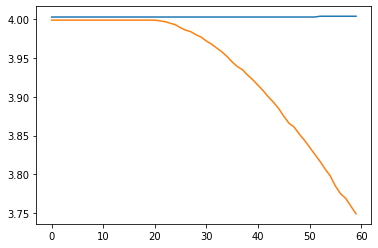

In [129]:
import random

#caseid = random.sample(caseids, 1)[0]
vals = np.load(f'{save_path}/{caseid}.npz')

print(caseid)
x = vals['PPF']
plt.plot(x[~np.isnan(x)])
y = vals['RFTN']
plt.plot(y[~np.isnan(y)])

### Intubation labeling

* intubation labeling은 vital file을 직접 열어봐야 해서 로컬에서 진행

In [ ]:
#2022-11-01 SRATE 300 validation of intubation time
import itertools as it
import os
import pandas as pd
import numpy as np
import random
import vitaldb
#from pyvital2 import arr
#from pyvital.pyvital import arr
import pickle
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import time, datetime


SRATE = 100
LEN_INPUT = 60
OVERLAP = 10
LEN_PER_PRE = 60
LEN_PER_POST = 60



# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)

def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T
## 60초짜리 inputp에 대해 f 그려보기


print(datetime.datetime.now())
SRATE = 300

print('loading vital data...')
start = time.time()

# tracks to extract / VENT_SET_TV -> VENT_INSP_TM, SET_INSP_TM
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE", "Solar8000/NIBP_MBP", "Solar8000/ART_MBP", "Solar8000/HR", "Solar8000/ETCO2"]

# create saving folder


# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")

# target patients' caseids
caseids = list(vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))


cnt = 0
non_intu, non_mbp, non_hr, emptyCO2 = [], [], [], []
for caseid in caseids[:10]:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}({caseid})', end='...')



    # get vital file and save as numpy
    vf = vitaldb.VitalFile(caseid, track_names)
    vals = vf.to_numpy(track_names, interval=1/SRATE)

    # intubation time - find the first t which satisfies vent_set_tm != nan & ppf_ce != nan
    t_intu = np.where(~np.isnan(vals[:,5]))[0][0]

    if not np.mean(~np.isnan(vals[:,2])):
        if not np.mean(~np.isnan(vals[:,3])):
            print(f'no valid data for insp_tm')

        intu = vals[:,3]
        intv = 850 *(SRATE/100)  # maximum interval for "Primus/SET_INSP_TM"
    else:
        intu = vals[:,2]
        intv = 250 *(SRATE/100)  # maximum interval for "Solar8000/VENT_INSP_TM"

    idc_intu = np.where(~np.isnan(intu))[0]
    while True:
        if t_intu >= len(vals[:,0]):
            non_intu.append(caseid)
            print('no valid intubation time')
            break

        # vent_insp_tm이 nan이 아닌 경우
        if not np.isnan(intu[t_intu]):
            idx = np.where(idc_intu==t_intu)[0][0]
            if idx + 10*(SRATE/100) >= len(idc_intu):
                non_intu.append(caseid)
                print('...no valid intubation time')
                break                
            prev = t_intu

            # 모여있는 vent_insp_tm 길이 계산
            switch = True
            for i in range(1,11):
                if idc_intu[idx+i] - prev > intv:
                    switch = False
                prev = idc_intu[idx+i]

            if switch:
                break
                # 초반에 vent_insp_tm이 예외적으로 측정된 경우 제외    
                # if abs(t_intu-t_etco2) < 5.5*60*SRATE:
                #    break
                # else:
                #    t_intu += 1
            else:
                t_intu += 1
        else:
            t_intu += 1


    # MBP value
    if not np.mean(~np.isnan(vals[:,6])):
        if not np.mean(~np.isnan(vals[:,7])):
            non_mbp.append(caseid)
            print(f'no valid data for MBP')
    nibp = vals[:,6]
    art = vals[:,7]
    mbp = np.array([art[i] if art[i]>30 else nibp[i] for i in range(len(nibp))])

    # HR
    if not np.mean(~np.isnan(vals[:,8])):
        non_hr.append(caseid)
        print('no valid data for HR')
    hr = vals[:,8]

    # non-event data : extract vital from previous 120s-60s from intubation
    ppg = vals[:,1]
    prev_ppg = ppg[t_intu - SRATE*120:t_intu - SRATE*60]

    ecg = vals[:,0]
    prev_ecg = ecg[t_intu - SRATE*120:t_intu - SRATE*60]

    nppf = vals[:,4]
    nppf = nppf[t_intu - SRATE*120:t_intu - SRATE*60]

    nrftn = vals[:,5]
    nrftn = nrftn[t_intu - SRATE*120:t_intu - SRATE*60]

    nmbp = mbp[t_intu - SRATE*120:t_intu - SRATE*60]
    nhr = hr[t_intu - SRATE*120:t_intu - SRATE*60]

    # after intubation, pain calculated using TSS, CISA
    post_ppg = ppg[t_intu:t_intu + SRATE*LEN_PER_POST]
    post_ecg = ecg[t_intu:t_intu + SRATE*LEN_PER_POST]

    ppf = vals[:,4]
    ppf = ppf[t_intu:t_intu + SRATE*LEN_PER_POST]

    rftn = vals[:,5]
    rftn = rftn[t_intu:t_intu + SRATE*LEN_PER_POST]

    embp = mbp[t_intu:t_intu + SRATE*LEN_PER_POST]
    ehr = hr[t_intu:t_intu + SRATE*LEN_PER_POST]

    print('  completed')
    
    # labeling
    event_recs = []
    event_recs.append({'dt': vf.dtstart + t_intu / SRATE, 'val': 'Intubation'})

    vf.add_track('EVENT', event_recs, mindisp=0, maxdisp=10)
    vf.to_vital(f'pain_study/vital_intu/{caseid}_intu.vital')

end = time.time()
print(f'total time: {end-start:.2f} sec')

# 3. Dataset

## preprocessing

In [ ]:
import pre_generator as gen
import pickle

gen.preprocess(file_path='input_60s', LEN_INPUT = 20, OVERLAP = 10, SRATE = 100)

In [12]:
df_demograph = pd.read_csv("https://api.vitaldb.net/cases")
df_demograph

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  opend  \
0          1       5955          0    11520      -540   10860     -540  10380   
1          2       2487          0    15720     -1020   14940     1740  14640   
2          3       2861          0     4440      -540    4260     -540   3960   
3          4       1903          0    21000      -720   20280     2580  18180   
4          5       4416          0    21540      -960   22440     2640  21840   
...      ...        ...        ...      ...       ...     ...      ...    ...   
6383    6384       5583          0    15240      -240   15660     -240  15060   
6384    6385       2278          0    20640      -540   21000     -540  19800   
6385    6386       4045          0    19440      -660   19140     3540  18540   
6386    6387       5230          0    12000      -540   12840     1740  12240   
6387    6388       1306          0    10260       -60   10140      -60   9540   

         adm      dis  ...  intraop_colloid  intraop_ppf  intraop_mdz  \
0    -236220   627780  ...                0          120          0.0   
1    -221160  1506840  ...                0          150          0.0   
2    -218640    40560  ...                0            0          0.0   
3    -201120   576480  ...                0           80          0.0   
4     -67560  3734040  ...                0            0          0.0   
...      ...      ...  ...              ...          ...          ...   
6383 -215340   648660  ...                0          150          0.0   
6384 -225600  1675200  ...                0          100          0.0   
6385 -200460   836340  ...                0           70          0.0   
6386 -227760   377040  ...                0          120          0.0   
6387 -312060   379140  ...              500          120          0.0   

     intraop_ftn  intraop_rocu  intraop_vecu  intraop_eph  intraop_phe  \
0            100            70             0           10            0   
1              0           100             0           20            0   
2              0            50             0            0            0   
3            100           100             0           50            0   
4              0           160             0           10          900   
...          ...           ...           ...          ...          ...   
6383           0            90             0           20            0   
6384           0           100             0           25           30   
6385           0           130             0           10            0   
6386           0            50             0            0            0   
6387           0            90             0           20            0   

      intraop_epi intraop_ca  
0               0          0  
1               0          0  
2               0          0  
3               0          0  
4               0       2100  
...           ...        ...  
6383            0          0  
6384            0        300  
6385            0          0  
6386            0          0  
6387            0          0  

[6388 rows x 74 columns]

In [29]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))
#df_preprocess.rename(columns = {'file_path' : 'caseid'}, inplace=True)


# age, gender 추가
df_demograph = pd.read_csv("https://api.vitaldb.net/cases")
df_preprocess['age'] = np.nan
df_preprocess['gender'] = np.nan


for idx, row in df_preprocess.iterrows():     
    row_demo = df_demograph[df_demograph['caseid']==int(row['caseid'])]


    df_preprocess.loc[idx, 'age'] = row_demo['age'].values[0]
    df_preprocess.loc[idx, 'gender'] = row_demo['sex'].values[0]

          
df_preprocess.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess, open('cache/preprocess/df_preprocess', 'wb'))
print('dumping success')   


df_preprocess

dumping start
dumping success


caseid                                                  1  \
0      5974          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
1       801          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2      2790          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
3      1413         [True, [0.0, 0.0, 0.0], [0.0, 0.05], 0, 0]   
4      4057          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
...     ...                                                ...   
2679   5882  [False, [0.0, 0.0, 0.0], [0.0, 0.9285714285714...   
2680    927  [False, [0.0, 0.0, 0.0], [0.0, 0.1666666666666...   
2681    373  [False, [0.0, 0.0, 0.0], [0.0, 0.8095238095238...   
2682   2530          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2683   1354  [True, [0.0, 0.0, 0.0], [0.043478260869565216,...   

                                                      2  \
0             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
1             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
3            [True, [0.0, 0.0, 0.0], [0.05, 0.0], 0, 0]   
4             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
...                                                 ...   
2679  [False, [0.0, 0.0, 0.0], [0.0, 0.6666666666666...   
2680       [True, [0.0, 0.0, 0.0], [0.0, 0.0625], 0, 0]   
2681  [False, [0.0, 0.0, 0.0], [0.0, 0.7894736842105...   
2682  [False, [0.0, 0.0, 0.0], [0.11764705882352941,...   
2683          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   

                                                      3  \
0             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
1             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
3     [True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
4             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
...                                                 ...   
2679  [False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
2680          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2681  [False, [0.0, 0.0, 0.0], [0.0, 0.2631578947368...   
2682        [False, [0.0, 0.0, 0.0], [0.25, 0.0], 0, 0]   
2683  [True, [0.0, 0.0, 0.0], [0.0, 0.09090909090909...   

                                                      4  \
0             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
1             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
3            [False, [0.0, 0.0, 0.0], [0.0, 0.1], 0, 0]   
4             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
...                                                 ...   
2679  [False, [0.0, 0.0, 0.0], [0.0, 0.2307692307692...   
2680        [False, [0.0, 0.0, 0.0], [0.25, 1.0], 0, 0]   
2681  [False, [0.0, 0.0, 0.0], [0.0, 0.3684210526315...   
2682  [False, [0.0, 0.0, 0.0], [0.1111111111111111, ...   
2683  [False, [0.0, 0.0, 0.0], [0.0, 0.2272727272727...   

                                                      5  \
0             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
1             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2             [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
3            [False, [0.0, 0.0, 0.0], [0.0, 0.2], 0, 0]   
4          [True, [0.0, 0.0, 0.0], [0.0625, 0.0], 0, 0]   
...                                                 ...   
2679  [True, [0.0, 0.0, 0.0], [0.0, 0.07692307692307...   
2680  [False, [0.0, 0.0, 0.0], [0.7857142857142857, ...   
2681  [False, [0.0, 0.0, 0.0], [0.0, 0.4210526315789...   
2682          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   
2683          [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]   

                                                      6  \
0     [True, [0.0, 0.0, 0.0], [0.0, 0.03846153846153...   
1     [False, [0.0, 0.0, 0.0], [0.03225806451612903,...   
2     [True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.2393666...   
3     [False, [0.0, 0.0, 0.0], [0.18181818181818182,...   
4     [True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37558...   
...                   

In [24]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))
ne_pass, e_pass = 0, 0


for _, row in df_preprocess.iterrows():   
    for i in range(0,5):
        if row[str(i+1)][0]:
            ne_pass = ne_pass + 1

    for i in range(5,10):
        if row[str(i+1)][0]:
            e_pass = e_pass + 1
            
print(f'non-event seg pass: {ne_pass/5/2684}, event seg pass: {e_pass/5/2684}')
print(f'passed segments : {ne_pass+e_pass}')

non-event seg pass: 0.46460506706408344, event seg pass: 0.3883755588673622
passed segments : 11447


In [4]:
# 2022/07/14
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess_220115', 'rb'))
ne_pass, e_pass = 0, 0


for _, row in df_preprocess.iterrows():   
    for i in range(0,5):
        if row[str(i+1)][0]:
            ne_pass = ne_pass + 1

    for i in range(5,10):
        if row[str(i+1)][0]:
            e_pass = e_pass + 1
            
print(f'non-event seg pass: {ne_pass/5/2684}, event seg pass: {e_pass/5/2684}')
print(f'passed segments : {ne_pass+e_pass}')
print(f'non-event seg: {ne_pass}, event seg: {e_pass}')

non-event seg pass: 0.4650521609538003, event seg pass: 0.3884500745156482
passed segments : 11454
non-event seg: 6241, event seg: 5213


## Caseid shuffling (training set, test set)

In [3]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))


# 살아남은 caseid 확인
p_caseids = []
for _, row in df_preprocess.iterrows():
    for i in range(0,10):
        if row[str(i+1)][0]:
            p_caseids.append(row['caseid'])
            break

print(f'survived caseids : {len(p_caseids)} cases / {len(df_preprocess)} cases')

survived caseids : 2100 cases / 2684 cases


In [5]:
# 2022/07/14
# 살아남은 caseid 확인
p_caseids = []
for _, row in df_preprocess.iterrows():
    for i in range(0,10):
        if row[str(i+1)][0]:
            p_caseids.append(row['caseid'])
            break

print(f'survived caseids : {len(p_caseids)} cases / {len(df_preprocess)} cases')

survived caseids : 2101 cases / 2684 cases


In [10]:
# 예전 방법
from sklearn.utils import shuffle


caseid_test = shuffle(p_caseids, n_samples = int(len(p_caseids) * 0.1))
caseid_train = np.setdiff1d(p_caseids, caseid_test)

#caseid_val = shuffle(caseid_train, n_samples = int(len(caseid_train) * 0.1))
#caseid_train = np.setdiff1d(caseid_train, caseid_val)


print('전체 caseid 수: {}'.format(len(p_caseids)))
print('train caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_test)))
#print('train caseid 수: {}, val caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_val), len(caseid_test)))


pickle.dump(caseid_train, open('../DL_model/caseid_train','wb'))
#pickle.dump(caseid_val, open('../DL_model/caseid_val','wb'))
pickle.dump(caseid_test, open('../DL_model/caseid_test','wb'))

전체 caseid 수: 2100
train caseid 수: 1890, test caseid 수: 210


In [4]:
import random, pickle
import numpy as np


# case 단위로 train, val, test case로 나눔
caseids = list(np.unique(p_caseids))
random.shuffle(caseids)

ntest = max(1, int(len(caseids) * 0.1))
nval = max(1, int(len(caseids) * (1 - 0.1) * 0.1))
ntrain = len(caseids) - ntest - nval

caseid_train = caseids[ntest + nval:]
caseid_val = caseids[ntest:ntest + nval]
caseid_test = caseids[:ntest]

print('전체 caseid 수: {}'.format(len(p_caseids)))
#print('train caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_test)))
print('train caseid 수: {}, val caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_val), len(caseid_test)))


pickle.dump(caseid_train, open('../DL_model/caseid_train','wb'))
pickle.dump(caseid_val, open('../DL_model/caseid_val','wb'))
pickle.dump(caseid_test, open('../DL_model/caseid_test','wb'))

전체 caseid 수: 2100
train caseid 수: 1701, val caseid 수: 189, test caseid 수: 210


## Input(x), Output(y)

### Lowess filtering

In [ ]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


LEN_INPUT = 20
OVERLAP = 10
SRATE = 100
n_aug = int((60-LEN_INPUT)/OVERLAP) + 1  


df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))
for f_num, rows in df_preprocess.iterrows():
    caseid = rows['caseid']
    print(f'\n###Input{f_num}/{len(df_preprocess)}: {caseid}###')
    

    # vital data 불러오기    
    file_path = 'input_60s'
    vals = np.load(f'{file_path}/{caseid}.npz')


    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  n_segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        # non-event data
        if rows[str(i+1)][0]:
            print(' passed...lowess filtering...', end='')
            
            save_path = f'cache/lowess_filtered/input20s-10s/{caseid}_n{i+1}.npz'
            if os.path.exists(save_path):
                print('already exists', end='')
                continue

            ppg_inp = vals['nPPG'][start_idx:end_idx]
            ecg_inp = vals['nECG'][start_idx:end_idx]
            
            ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            # lowess filter 적용
            ppg_input = ppg_inp - lowess(ppg_inp)
            ecg_input = ecg_inp - lowess(ecg_inp)
            
            np.savez(save_path, ECG = ecg_input, PPG = ppg_input)
            print('done', end=' ')

    print('')
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
            
        # event data
        if rows[str(i+n_aug+1)][0]:
            print(' passed...lowess filtering...', end='')
            
            save_path = f'cache/lowess_filtered/input20s-10s/{caseid}_{i+1}.npz'
            if os.path.exists(save_path):
                print('already exists', end='')
                continue

            ppg_inp = vals['PPG'][start_idx:end_idx]
            ecg_inp = vals['ECG'][start_idx:end_idx]
            
            ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            # lowess filter 적용
            ppg_input = ppg_inp - lowess(ppg_inp)
            ecg_input = ecg_inp - lowess(ecg_inp)
            
            np.savez(save_path, ECG = ecg_input, PPG = ppg_input) 
            print('done', end=' ')

### dataset

In [8]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal


### input 설정
SRATE = 100 # 100Hz
LEN_INPUT = 20 # input 10s
OVERLAP = 10
n_aug = int((60-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수


input_path = '../DL_model/dataset/60s-len20s-10s/'
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])

    
if os.path.exists(input_path+'x_train.npz'):
    print('loading train...', flush=True, end='')
    x_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
    y_train = np.load(input_path+'y_train.npz')['arr_0']
    x_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
    y_test = np.load(input_path+'y_test.npz')['arr_0']
    print('done', flush=True)

    
else:  
    df_preprocess = pickle.load(open('../Preprocess/cache/preprocess/df_preprocess', 'rb'))

    ### test set에 해당하는 file_path
    caseid_test = pickle.load(open('../DL_model/caseid_test', 'rb'))
    caseid_train = pickle.load(open('../DL_model/caseid_train', 'rb'))
    caseid_val = pickle.load(open('../DL_model/caseid_val', 'rb'))
    
    # variables
    non_lis = []
    x_train, tss_train, cisa_train = [], [], []
    x_test, tss_test, cisa_test = [], [], []
    x_val, tss_val, cisa_val = [], [], []
    age_train, gender_train = [], []
    age_test, gender_test = [], []
    age_val, gender_val = [], []
    
    
    for cnt, row in df_preprocess.iterrows():
        print(f'loading data {cnt+1}/{len(df_preprocess)}...', end='')
        caseid = row['caseid']    
        
        lowess_path = f'../Preprocess/cache/lowess_filtered/input20s-10s/{caseid}'
    
        
        for i in range(n_aug):
            # non-event input
            if row[str(i+1)][0]:
                lowess_inp = np.load(open(lowess_path+f'_n{i+1}.npz','rb'))
                ppg_input = lowess_inp['PPG']
                ecg_input = lowess_inp['ECG']
                
                ppg_input = ppg_input - np.nanmean(ppg_input)
                ecg_input = (ecg_input - min(ecg_input)) / (max(ecg_input) - min(ecg_input))
        
                
                # 해당 caseid가 test set에 속하는 경우
                if row['caseid'] in caseid_test:
                    age_test.append(int(row['age']))
                    if row['gender']=='F':
                        gender_test.append(1)
                    else:
                        gender_test.append(0)
                    x_test.append([ppg_input, ecg_input])
                    tss_test.append(row[str(i+1)][3])
                    cisa_test.append(row[str(i+1)][4])
  
                # 해당 caseid가 val set에 해당하는 경우
                elif row['caseid'] in caseid_val:
                    age_val.append(int(row['age']))
                    if row['gender']=='F':
                        gender_val.append(1)
                    else:
                        gender_val.append(0)                    
                    x_val.append([ppg_input, ecg_input])
                    tss_val.append(row[str(i+1)][3])
                    cisa_val.append(row[str(i+1)][4])
               
                # 해당 caseid가 train set에 해당하는 경우
                elif row['caseid'] in caseid_train:
                    age_train.append(int(row['age']))
                    if row['gender']=='F':
                        gender_train.append(1)
                    else:
                        gender_train.append(0)                    
                    x_train.append([ppg_input, ecg_input])
                    tss_train.append(row[str(i+1)][3])
                    cisa_train.append(row[str(i+1)][4])
                    
                else:
                    print('no case%$')
                    non_lis.append(row['caseid'])
                    
                    
            # event input
            if row[str(i+n_aug+1)][0]:
                lowess_inp = np.load(open(lowess_path+f'_{i +1}.npz','rb'))
                ppg_input = lowess_inp['PPG']
                ecg_input = lowess_inp['ECG']
                
                ppg_input = ppg_input - np.nanmean(ppg_input)
                ecg_input = (ecg_input - min(ecg_input)) / (max(ecg_input) - min(ecg_input))
        
                
                # 해당 caseid가 test set에 속하는 경우
                if row['caseid'] in caseid_test:
                    age_test.append(int(row['age']))
                    if row['gender']=='F':
                        gender_test.append(1)
                    else:
                        gender_test.append(0)
                    x_test.append([ppg_input, ecg_input])
                    tss_test.append(row[str(i+n_aug+1)][3])
                    cisa_test.append(row[str(i+n_aug+1)][4])
  
                # 해당 caseid가 val set에 해당하는 경우
                elif row['caseid'] in caseid_val:
                    age_val.append(int(row['age']))
                    if row['gender']=='F':
                        gender_val.append(1)
                    else:
                        gender_val.append(0)                    
                    x_val.append([ppg_input, ecg_input])
                    tss_val.append(row[str(i+n_aug+1)][3])
                    cisa_val.append(row[str(i+n_aug+1)][4])
               
                # 해당 caseid가 train set에 해당하는 경우
                elif row['caseid'] in caseid_train:
                    age_train.append(int(row['age']))
                    if row['gender']=='F':
                        gender_train.append(1)
                    else:
                        gender_train.append(0)                    
                    x_train.append([ppg_input, ecg_input])
                    tss_train.append(row[str(i+n_aug+1)][3])
                    cisa_train.append(row[str(i+n_aug+1)][4])
                    
                else:
                    print('no case%$')
                    non_lis.append(row['caseid'])                    
                    
        print('completed')

    
    x_train = np.array(x_train, np.float32)
    x_test = np.array(x_test, np.float32)
    x_val = np.array(x_val, np.float32)
    tss_train = np.array(tss_train, np.float32)
    tss_test = np.array(tss_test, np.float32)
    tss_val = np.array(tss_val, np.float32)
    cisa_train = np.array(cisa_train, np.float32)
    cisa_test = np.array(cisa_test, np.float32)
    cisa_val = np.array(cisa_val, np.float32)
        
    age_train = np.array(age_train, int)
    age_test = np.array(age_test, int)
    age_val = np.array(age_val, int)
    gender_train = np.array(gender_train, int)
    gender_test = np.array(gender_test, int)
    gender_val = np.array(gender_val, int)
    
    
    # 알맞게 input 변환
    x_train = np.transpose(x_train, [0,2,1])
    x_val = np.transpose(x_val, [0,2,1])
    x_test = np.transpose(x_test, [0,2,1])

    print('after concatenate + transpose')
    print('x_train shape:', x_train.shape)
    print('x_val shape:', x_val.shape)
    print('x_test shape:', x_test.shape)

          
    # 저장하기
    print('saving...', end='', flush=True)
    np.savez_compressed(input_path+'x_train.npz', x_train)
    np.savez_compressed(input_path+'x_test.npz', x_test)
    np.savez_compressed(input_path+'x_val.npz', x_val)
    np.savez_compressed(input_path+'tss_train.npz', tss_train)
    np.savez_compressed(input_path+'tss_test.npz', tss_test)
    np.savez_compressed(input_path+'tss_val.npz', tss_val)
    np.savez_compressed(input_path+'cisa_train.npz', cisa_train)
    np.savez_compressed(input_path+'cisa_test.npz', cisa_test)
    np.savez_compressed(input_path+'cisa_val.npz', cisa_val)
    
    np.savez_compressed(input_path+'age_train.npz', age_train)
    np.savez_compressed(input_path+'age_test.npz', age_test)
    np.savez_compressed(input_path+'age_val.npz', age_val)    
    np.savez_compressed(input_path+'gender_train.npz', gender_train)
    np.savez_compressed(input_path+'gender_test.npz', gender_test)
    np.savez_compressed(input_path+'gender_val.npz', gender_val)    
    
    print('done', flush=True)

        
print('size of training set(pacu):', len(x_train))
print('size of validation set(pacu):', len(x_val))
print('size of test set(pacu):', len(x_test))

loading data 1/2684...completed
loading data 2/2684...completed
loading data 3/2684...completed
loading data 4/2684...completed
loading data 5/2684...completed
loading data 6/2684...completed
loading data 7/2684...completed
loading data 8/2684...completed
loading data 9/2684...completed
loading data 10/2684...completed
loading data 11/2684...completed
loading data 12/2684...completed
loading data 13/2684...completed
loading data 14/2684...completed
loading data 15/2684...completed
loading data 16/2684...completed
loading data 17/2684...completed
loading data 18/2684...completed
loading data 19/2684...completed
loading data 20/2684...completed
loading data 21/2684...completed
loading data 22/2684...completed
loading data 23/2684...completed
loading data 24/2684...completed
loading data 25/2684...completed
loading data 26/2684...completed
loading data 27/2684...completed
loading data 28/2684...completed
loading data 29/2684...completed
loading data 30/2684...completed
loading data 31/268

# learn.py

In [ ]:
%load_ext autoreload
%autoreload 2

import learn

learn.load_vital_data('vital_to_np')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading vital data...
1/2699(3)...48557
2/2699(8)...11997
3/2699(9)...39190
4/2699(13)...86596
5/2699(14)...35138
6/2699(16)...36578
7/2699(17)...36990
8/2699(19)...40770
9/2699(20)...70645
10/2699(22)...28427
11/2699(28)...47418
12/2699(29)...97266
13/2699(30)...23567
14/2699(35)...61530
15/2699(36)...40082
16/2699(40)...38947
17/2699(42)...84053
18/2699(44)...42878
19/2699(45)...91473
20/2699(46)...82007
21/2699(47)...21423
22/2699(48)...123143
23/2699(50)...30938
24/2699(54)...29642
25/2699(57)...30190
26/2699(59)...44006
27/2699(67)...178394
28/2699(69)...45849
29/2699(70)...45515
30/2699(72)...36813
31/2699(74)...232657
32/2699(75)...106355
33/2699(77)...15417
34/2699(78)...68456
35/2699(83)...149116
36/2699(88)...33804
37/2699(93)...44461
38/2699(101)...59702
39/2699(103)...38771
40/2699(104)...21994
41/2699(106)...94360
42/2699(109)...20289
43/2699(121)...93020
44/2699(122)...126666
45/2699(1

# 2022-08-06 작업
* RFTN을 연속값(Orchestra에서 1초 간격 sampling된 time series)를 뽑기

In [8]:
# 20220806
import random
import scipy.stats
import statsmodels.api as sm

# variables
SRATE = 100
LEN_INPUT = 20
OVERLAP = 10
LEN_PER_PRE = 60
LEN_PER_POST = 60

n_aug = int((LEN_PER_PRE-LEN_INPUT)/OVERLAP) + 1   # number of data augmentation
n_aug2 = int((LEN_PER_POST-LEN_INPUT)/OVERLAP) + 1


# function
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


df_preprocess = pickle.load(open('cache/preprocess/df_preprocess_220115', 'rb'))

# shuffle caseids which has survived preprocessing
p_caseids = []
for _, row in df_preprocess.iterrows():
    for i in range(0,10):
        if row[str(i+1)][0]:
            p_caseids.append(row['caseid'])
            break
print(f'survived caseids : {len(p_caseids)} cases / {len(df_preprocess)} cases')

# caseid 단위로 train, val, test set로 나눔
caseids = list(np.unique(p_caseids))
random.shuffle(caseids)

ntest = max(1, int(len(caseids) * 0.1))
nval = max(1, int(len(caseids) * (1 - 0.1) * 0.1))
ntrain = len(caseids) - ntest - nval

caseid_train = caseids[ntest + nval:]
caseid_val = caseids[ntest:ntest + nval]
caseid_test = caseids[:ntest]

print('전체 caseid 수: {}'.format(len(p_caseids)))
print('train caseid 수: {}, val caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_val), len(caseid_test)))

pickle.dump(caseid_train, open('../DL_model/pd/caseid_train','wb'))
pickle.dump(caseid_val, open('../DL_model/pd/caseid_val','wb'))
pickle.dump(caseid_test, open('../DL_model/pd/caseid_test','wb'))


# input - filtering, saving
input_path = f"../DL_model/dataset/PD_ne{LEN_PER_PRE}s-e{LEN_PER_POST}s-len{LEN_INPUT}-{OVERLAP}/"
if not os.path.exists('../DL_model/dataset'):
    os.mkdir('../DL_model/dataset')
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])
    
    
# variables
non_lis = []
x_train, rftn_train, hr_train = [], [], []
x_test, rftn_test, hr_test = [], [], []
x_val, rftn_val, hr_val = [], [], []
age_train, gender_train = [], []
age_test, gender_test = [], []
age_val, gender_val = [], []
     

    
file_path = f'vital_to_np'#_{LEN_PER_PRE}s-{LEN_PER_POST}s'
for f_num, row in df_preprocess.iterrows():
    caseid = row['caseid']
    print(f'\n###Input{f_num}/{len(df_preprocess)}: {caseid}###')
    

    # vital data 불러오기    
    vals = np.load(f'{file_path}/{caseid}.npz')


    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  n_segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        # non-event data
        if row[str(i+1)][0] & row[str(i+n_aug+1)][0]:
            print(' passed...lowess filtering...', end='')
            
            #save_path = f'cache/lowzess_filtered/intu120s-input20s-10s/{caseid}_n{i+1}.npz'

            ppg_inp = vals['nPPG'][start_idx:end_idx]
            ecg_inp = vals['nECG'][start_idx:end_idx]
            rftn = vals['RFTN'][start_idx:end_idx]
            
            ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            rftn = pd.DataFrame(rftn).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            # lowess filter 적용
            ppg_input = ppg_inp - lowess(ppg_inp)
            ecg_input = ecg_inp - lowess(ecg_inp)
            
            ppg_input = ppg_input - np.nanmean(ppg_input)
            ecg_input = ecg_input - np.nanmean(ecg_input)
            #ecg_input = (ecg_input - min(ecg_input)) / (max(ecg_input) - min(ecg_input))
            
            del_hr = np.nanmean(vals['HR'][start_idx:end_idx]) / np.nanmean(vals['nHR'][start_idx:end_idx]) - 1
            

            # 해당 caseid가 test set에 속하는 경우
            if row['caseid'] in caseid_test:
                age_test.append(int(row['age']))
                if row['gender']=='F':
                    gender_test.append(1)
                else:
                    gender_test.append(0)
                x_test.append([ppg_input, ecg_input])
                rftn_test.append(rftn)
                hr_test.append(del_hr)

            # 해당 caseid가 val set에 해당하는 경우
            elif row['caseid'] in caseid_val:
                age_val.append(int(row['age']))
                if row['gender']=='F':
                    gender_val.append(1)
                else:
                    gender_val.append(0)                    
                x_val.append([ppg_input, ecg_input])
                rftn_val.append(rftn)
                hr_val.append(del_hr)

            # 해당 caseid가 train set에 해당하는 경우
            elif row['caseid'] in caseid_train:
                age_train.append(int(row['age']))
                if row['gender']=='F':
                    gender_train.append(1)
                else:
                    gender_train.append(0)                    
                x_train.append([ppg_input, ecg_input])
                rftn_train.append(rftn)
                hr_train.append(del_hr)

            else:
                print('no case%$')
                non_lis.append(row['caseid'])

            #np.savez(save_path, ECG = ecg_input, PPG = ppg_input)
            print('done', end=' ')
    
    print('')
    for i in range(n_aug2):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
            
        # event data
        if row[str(i+n_aug+1)][0]:
            print(' passed...lowess filtering...', end='')
            
            #save_path = f'cache/lowess_filtered/input20s-10s/{caseid}_{i+1}.npz'
            ppg_inp = vals['PPG'][start_idx:end_idx]
            ecg_inp = vals['ECG'][start_idx:end_idx]
            rftn = vals['RFTN'][start_idx:end_idx]
            
            ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            rftn = pd.DataFrame(rftn).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
                       
            # lowess filter 적용
            ppg_input = ppg_inp - lowess(ppg_inp)
            ecg_input = ecg_inp - lowess(ecg_inp)
            
            ppg_input = ppg_input - np.nanmean(ppg_input)
            ecg_input = ecg_input - np.nanmean(ecg_input)
            #ecg_input = (ecg_input - min(ecg_input)) / (max(ecg_input) - min(ecg_input))


            # 해당 caseid가 test set에 속하는 경우
            if row['caseid'] in caseid_test:
                age_test.append(int(row['age']))
                if row['gender']=='F':
                    gender_test.append(1)
                else:
                    gender_test.append(0)
                x_test.append([ppg_input, ecg_input])
                rftn_test.append(rftn)
                hr_test.append(row[str(i+n_aug+1)][4])

            # 해당 caseid가 val set에 해당하는 경우
            elif row['caseid'] in caseid_val:
                age_val.append(int(row['age']))
                if row['gender']=='F':
                    gender_val.append(1)
                else:
                    gender_val.append(0)                    
                x_val.append([ppg_input, ecg_input])
                rftn_val.append(rftn)
                hr_val.append(row[str(i+n_aug+1)][4])

            # 해당 caseid가 train set에 해당하는 경우
            elif row['caseid'] in caseid_train:
                age_train.append(int(row['age']))
                if row['gender']=='F':
                    gender_train.append(1)
                else:
                    gender_train.append(0)                    
                x_train.append([ppg_input, ecg_input])
                rftn_train.append(rftn)
                hr_train.append(row[str(i+n_aug+1)][4])

            else:
                print('no case%$')
                non_lis.append(row['caseid'])                 
            
            #np.savez(save_path, ECG = ecg_input, PPG = ppg_input) 
            print('done', end=' ')

x_train = np.array(x_train, np.float32)
x_test = np.array(x_test, np.float32)
x_val = np.array(x_val, np.float32)
rftn_train = np.array(rftn_train, np.float32)
rftn_test = np.array(rftn_test, np.float32)
rftn_val = np.array(rftn_val, np.float32)
hr_train = np.array(hr_train, np.float32)
hr_test = np.array(hr_test, np.float32)
hr_val = np.array(hr_val, np.float32)

age_train = np.array(age_train, int)
age_test = np.array(age_test, int)
age_val = np.array(age_val, int)
gender_train = np.array(gender_train, int)
gender_test = np.array(gender_test, int)
gender_val = np.array(gender_val, int)


# 알맞게 input 변환
x_train = np.transpose(x_train, [0,2,1])
x_val = np.transpose(x_val, [0,2,1])
x_test = np.transpose(x_test, [0,2,1])

print('after concatenate + transpose')
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)


# 저장하기
print('saving...', end='', flush=True)
np.savez_compressed(input_path+'x_train.npz', x_train)
np.savez_compressed(input_path+'x_test.npz', x_test)
np.savez_compressed(input_path+'x_val.npz', x_val)
np.savez_compressed(input_path+'rftn_train.npz', rftn_train)
np.savez_compressed(input_path+'rftn_test.npz', rftn_test)
np.savez_compressed(input_path+'rftn_val.npz', rftn_val)
np.savez_compressed(input_path+'hr_train.npz', hr_train)
np.savez_compressed(input_path+'hr_test.npz', hr_test)
np.savez_compressed(input_path+'hr_val.npz', hr_val)

np.savez_compressed(input_path+'age_train.npz', age_train)
np.savez_compressed(input_path+'age_test.npz', age_test)
np.savez_compressed(input_path+'age_val.npz', age_val)    
np.savez_compressed(input_path+'gender_train.npz', gender_train)
np.savez_compressed(input_path+'gender_test.npz', gender_test)
np.savez_compressed(input_path+'gender_val.npz', gender_val)    

print('done', flush=True)
print('size of training set(pacu):', len(x_train))
print('size of validation set(pacu):', len(x_val))
print('size of test set(pacu):', len(x_test))

survived caseids : 2101 cases / 2684 cases
전체 caseid 수: 2101
train caseid 수: 1702, val caseid 수: 189, test caseid 수: 210

###Input0/2684: 5974###
  n_segment 1 passed...lowess filtering...done   n_segment 2 passed...lowess filtering...done   n_segment 3 passed...lowess filtering...done   n_segment 4 passed...lowess filtering...done   n_segment 5 passed...lowess filtering...done 
  segment 1 passed...lowess filtering...done   segment 2 passed...lowess filtering...done   segment 3 passed...lowess filtering...done   segment 4 passed...lowess filtering...done   segment 5 passed...lowess filtering...done 
###Input1/2684: 801###
  n_segment 1 passed...lowess filtering...done   n_segment 2 passed...lowess filtering...done   n_segment 3 passed...lowess filtering...done   n_segment 4 passed...lowess filtering...done   n_segment 5 passed...lowess filtering...done 
  segment 1  segment 2  segment 3  segment 4  segment 5
###Input2/2684: 2790###
  n_segment 1 passed...lowess filtering...done   n_se

### delta HR for 60, 30, 20 sec / mean, max, min

In [83]:
# variables
SRATE = 100
LEN_INPUT = 20
OVERLAP = 10
LEN_PER_PRE = 60
LEN_PER_POST = 60

n_aug = int((LEN_PER_PRE-LEN_INPUT)/OVERLAP) + 1   # number of data augmentation
n_aug2 = int((LEN_PER_POST-LEN_INPUT)/OVERLAP) + 1


# function
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


df_preprocess = pickle.load(open('cache/preprocess/df_preprocess_220115', 'rb'))


# variables
non_lis = []
x_train, rftn_train, cisa_train = [], [], []
x_test, rftn_test, cisa_test = [], [], []
x_val, rftn_val, cisa_val = [], [], []
age_train, gender_train = [], []
age_test, gender_test = [], []
age_val, gender_val = [], []
hr60, hr30, hr20 = [], [], []
max60, max30, max20 = [], [], []
med60, med30, med20 = [], [], []

    
file_path = f'vital_to_np'#_{LEN_PER_PRE}s-{LEN_PER_POST}s'
for f_num, row in df_preprocess.iterrows():
    caseid = row['caseid']
    print(f'###Input{f_num}/{len(df_preprocess)}: {caseid}###', end='  ')
    

    # vital data 불러오기    
    vals = np.load(f'{file_path}/{caseid}.npz')


    hr = vals['HR']
    nhr = vals['nHR']
    
    if len(hr) == 0 or len(nhr) == 0:
        print(f'empty hr - {len(nhr), len(hr)}')
        continue
    
    if np.nanmean(nhr) == 0 or np.nanmean(nhr[-30*SRATE:]) == 0 or np.nanmean(nhr[-20*SRATE:]) == 0 :
        print('no valid value for nhr')
        continue
    if np.nanmean(hr[:60*SRATE]) == 0 or np.nanmean(hr[:30*SRATE]) == 0 or np.nanmean(hr[:20*SRATE]) == 0 :
        print('no valid value for hr')
        continue
        
    hr = [np.nan if ele <= 0 else ele for ele in hr]
    nhr = [np.nan if ele <= 0 else ele for ele in nhr]
    
    del60 = np.nanmean(hr[:60*SRATE]) / np.nanmean(nhr) - 1
    del30 = np.nanmean(hr[:30*SRATE]) / np.nanmean(nhr[-30*SRATE:]) - 1
    del20 = np.nanmean(hr[:20*SRATE]) / np.nanmean(nhr[-20*SRATE:]) - 1
    hr60.append(del60)
    hr30.append(del30)
    hr20.append(del20)
    
    m60 = np.nanmedian(hr[:60*SRATE]) / np.nanmedian(nhr) - 1
    m30 = np.nanmedian(hr[:30*SRATE]) / np.nanmedian(nhr[-30*SRATE:]) - 1
    m20 = np.nanmedian(hr[:20*SRATE]) / np.nanmedian(nhr[-20*SRATE:]) - 1
    med60.append(m60)
    med30.append(m30)
    med20.append(m20)
    
    mx60 = np.nanmax(hr[:60*SRATE]) / np.nanmax(nhr) - 1
    mx30 = np.nanmax(hr[:30*SRATE]) / np.nanmax(nhr[-30*SRATE:]) - 1
    mx20 = np.nanmax(hr[:20*SRATE]) / np.nanmax(nhr[-20*SRATE:]) - 1
    max60.append(mx60)
    max30.append(mx30)
    max20.append(mx20)

    print('')

    '''
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  n_segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        # non-event data
        if row[str(i+1)][0] & row[str(i+n_aug+1)][0]:
            print(' passed...lowess filtering...', end='')
            
            #save_path = f'cache/lowzess_filtered/intu120s-input20s-10s/{caseid}_n{i+1}.npz'

            ppg_inp = vals['nPPG'][start_idx:end_idx]
            ecg_inp = vals['nECG'][start_idx:end_idx]
            rftn = vals['RFTN'][start_idx:end_idx]
            
            ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            rftn = pd.DataFrame(rftn).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            # lowess filter 적용
            ppg_input = ppg_inp - lowess(ppg_inp)
            ecg_input = ecg_inp - lowess(ecg_inp)
            
            ppg_input = ppg_input - np.nanmean(ppg_input)
            ecg_input = ecg_input - np.nanmean(ecg_input)
            #ecg_input = (ecg_input - min(ecg_input)) / (max(ecg_input) - min(ecg_input))
            
            
            np.nanmean(vals['HR'][start_idx:end_idx]) / np.nanmean(vals['nHR'][start_idx:end_idx]) - 1
            print(Abc)
    '''

###Input0/2684: 5974###  
###Input1/2684: 801###  
###Input2/2684: 2790###  
###Input3/2684: 1413###  
###Input4/2684: 4057###  
###Input5/2684: 1698###  
###Input6/2684: 2084###  
###Input7/2684: 845###  
###Input8/2684: 83###  
###Input9/2684: 5976###  
###Input10/2684: 3923###  
###Input11/2684: 1349###  
###Input12/2684: 3907###  
###Input13/2684: 4108###  
###Input14/2684: 263###  
###Input15/2684: 4885###  
###Input16/2684: 104###  
###Input17/2684: 684###  
###Input18/2684: 121###  
###Input19/2684: 2413###  
###Input20/2684: 6095###  
###Input21/2684: 3991###  
###Input22/2684: 584###  
###Input23/2684: 3417###  
###Input24/2684: 4503###  
###Input25/2684: 2419###  
###Input26/2684: 6278###  
###Input27/2684: 6128###  
###Input28/2684: 1906###  
###Input29/2684: 1490###  
###Input30/2684: 4868###  
###Input31/2684: 1992###  
###Input32/2684: 5566###  
###Input33/2684: 1030###  
###Input34/2684: 2770###  
###Input35/2684: 3729###  
###Input36/2684: 1638###  
###Input37/2684: 108

/tmp/ipykernel_2136791/2075151461.py:51: RuntimeWarning: Mean of empty slice
  if np.nanmean(nhr) == 0 or np.nanmean(nhr[-30*SRATE:]) == 0 or np.nanmean(nhr[-20*SRATE:]) == 0 :
/tmp/ipykernel_2136791/2075151461.py:61: RuntimeWarning: Mean of empty slice
  del60 = np.nanmean(hr[:60*SRATE]) / np.nanmean(nhr) - 1
/tmp/ipykernel_2136791/2075151461.py:62: RuntimeWarning: Mean of empty slice
  del30 = np.nanmean(hr[:30*SRATE]) / np.nanmean(nhr[-30*SRATE:]) - 1
/tmp/ipykernel_2136791/2075151461.py:63: RuntimeWarning: Mean of empty slice
  del20 = np.nanmean(hr[:20*SRATE]) / np.nanmean(nhr[-20*SRATE:]) - 1
/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/tmp/ipykernel_2136791/2075151461.py:75: RuntimeWarning: All-NaN axis encountered
  mx60 = np.nanmax(hr[:60*SRATE]) / np.nanmax(nhr) - 1
/tmp/ipykernel_2136791/2075151461.py:76: Runti


###Input80/2684: 2016###  
###Input81/2684: 5489###  
###Input82/2684: 3253###  
###Input83/2684: 699###  
###Input84/2684: 4228###  
###Input85/2684: 4073###  
###Input86/2684: 4194###  
###Input87/2684: 4816###  
###Input88/2684: 4634###  
###Input89/2684: 2120###  
###Input90/2684: 4140###  
###Input91/2684: 3679###  
###Input92/2684: 4722###  
###Input93/2684: 1161###  
###Input94/2684: 369###  
###Input95/2684: 706###  empty hr - (0, 12000)
###Input96/2684: 4091###  
###Input97/2684: 3626###  
###Input98/2684: 5572###  
###Input99/2684: 4190###  
###Input100/2684: 1469###  
###Input101/2684: 1967###  
###Input102/2684: 5980###  
###Input103/2684: 4961###  
###Input104/2684: 1813###  
###Input105/2684: 2122###  
###Input106/2684: 1300###  
###Input107/2684: 6161###  
###Input108/2684: 1920###  
###Input109/2684: 1704###  
###Input110/2684: 2453###  
###Input111/2684: 4585###  
###Input112/2684: 44###  
###Input113/2684: 503###  
###Input114/2684: 2232###  
###Input115/2684: 591###

/tmp/ipykernel_2136791/2075151461.py:54: RuntimeWarning: Mean of empty slice
  if np.nanmean(hr[:60*SRATE]) == 0 or np.nanmean(hr[:30*SRATE]) == 0 or np.nanmean(hr[:20*SRATE]) == 0 :



###Input145/2684: 3630###  
###Input146/2684: 4762###  
###Input147/2684: 4417###  
###Input148/2684: 3862###  
###Input149/2684: 1795###  
###Input150/2684: 3657###  
###Input151/2684: 1940###  
###Input152/2684: 193###  
###Input153/2684: 5761###  
###Input154/2684: 5509###  
###Input155/2684: 1345###  
###Input156/2684: 3889###  
###Input157/2684: 6157###  
###Input158/2684: 2507###  
###Input159/2684: 3627###  
###Input160/2684: 433###  
###Input161/2684: 3573###  
###Input162/2684: 3678###  
###Input163/2684: 4490###  
###Input164/2684: 6015###  
###Input165/2684: 4464###  
###Input166/2684: 671###  
###Input167/2684: 424###  
###Input168/2684: 1894###  
###Input169/2684: 378###  
###Input170/2684: 413###  
###Input171/2684: 4856###  
###Input172/2684: 778###  
###Input173/2684: 4872###  
###Input174/2684: 4851###  
###Input175/2684: 6146###  
###Input176/2684: 453###  
###Input177/2684: 634###  
###Input178/2684: 5208###  
###Input179/2684: 143###  
###Input180/2684: 832###  
##

### Plotting

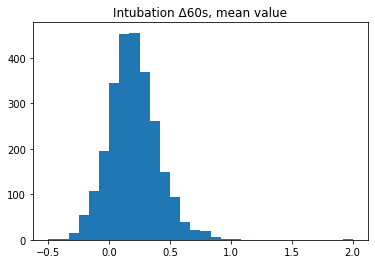

max 1.9861862365905942, min -0.49880287310454907


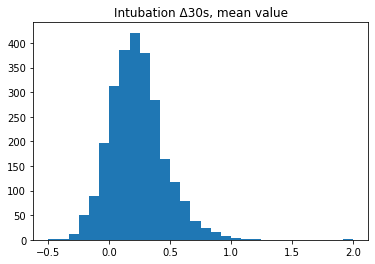

max 1.9377377713406765, min -0.45231025492468135


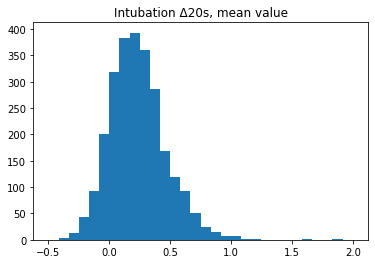

max 1.8705706596374512, min -0.41274505853652954


In [53]:
x = np.array(hr60)
arra = (x[~np.isnan(x)])

plt.hist(arra, bins = 30, range = (-0.5,2))
plt.title('Intubation Δ60s, mean value')
plt.show()
print(f'max {np.max(arra)}, min {np.min(arra)}')

x = np.array(hr30)
arra = (x[~np.isnan(x)])

plt.hist(arra, bins = 30, range = (-0.5,2))
plt.title('Intubation Δ30s, mean value')
plt.show()
print(f'max {np.max(arra)}, min {np.min(arra)}')

x = np.array(hr20)
arra = (x[~np.isnan(x)])

plt.hist(arra, bins = 30, range = (-0.5,2))
plt.title('Intubation Δ20s, mean value')
plt.show()
print(f'max {np.max(arra)}, min {np.min(arra)}')


60s mean value : max 1.99, min -0.50
30s mean value : max 1.94, min -0.45
20s mean value : max 1.87, min -0.41
60s median value : max 2.07, min -0.59
30s median value : max 2.10, min -0.56
20s median value : max 1.80, min -0.47
60s max value : max 1.69, min -0.47
30s max value : max 1.69, min -0.42
20s max value : max 1.69, min -0.43


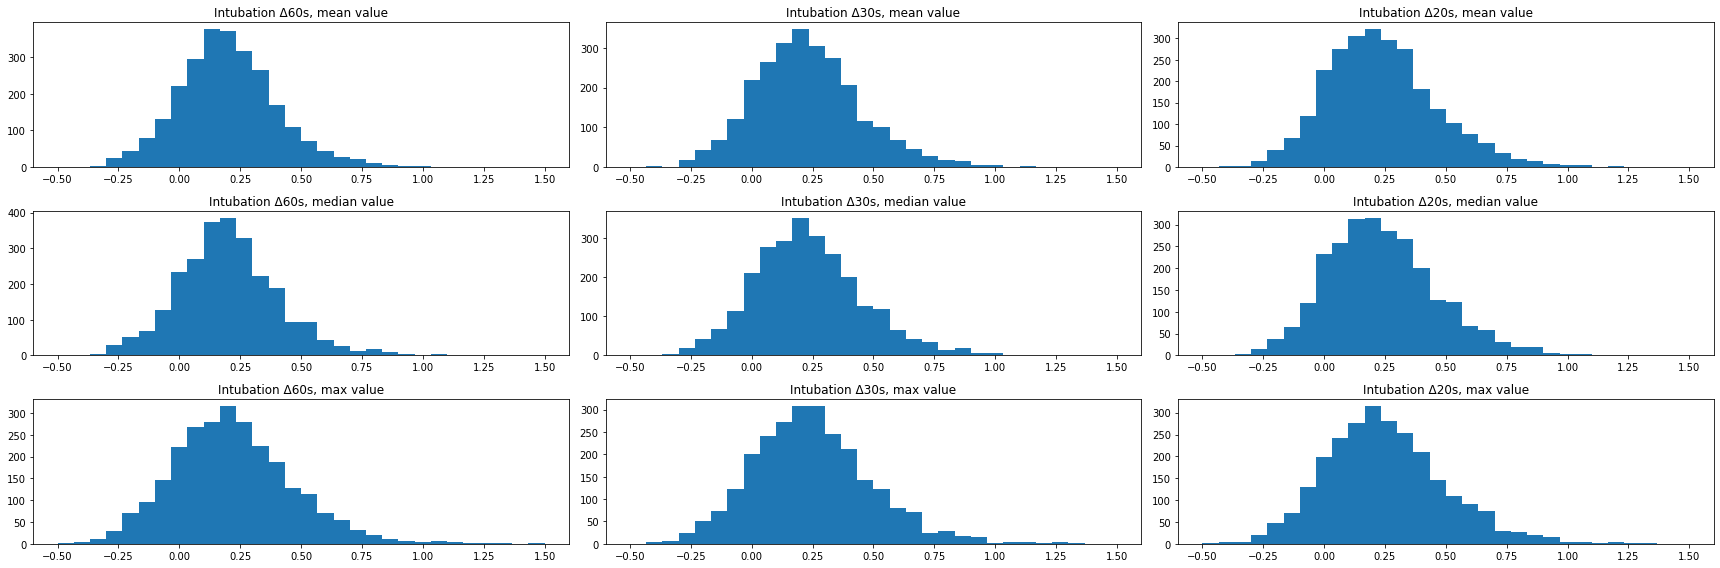

In [90]:
set_min = -0.5
set_max = 1.5

# mean value plotting
x = np.array(hr60)
arra = (x[~np.isnan(x)])

fig, ax = plt.subplots(3,3, figsize=(24,8))
ax[0,0].hist(arra, bins = 30, range = (set_min,set_max))
ax[0,0].set_title('Intubation Δ60s, mean value')
print(f'60s mean value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')

x = np.array(hr30)
arra = (x[~np.isnan(x)])

ax[0,1].hist(arra, bins = 30, range = (set_min,set_max))
ax[0,1].set_title('Intubation Δ30s, mean value')
print(f'30s mean value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')

x = np.array(hr20)
arra = (x[~np.isnan(x)])

ax[0,2].hist(arra, bins = 30, range = (set_min,set_max))
ax[0,2].set_title('Intubation Δ20s, mean value')
print(f'20s mean value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')


# median value plotting
x = np.array(med60)
arra = (x[~np.isnan(x)])

ax[1,0].hist(arra, bins = 30, range = (set_min,set_max))
ax[1,0].set_title('Intubation Δ60s, median value')
print(f'60s median value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')

x = np.array(med30)
arra = (x[~np.isnan(x)])

ax[1,1].hist(arra, bins = 30, range = (set_min,set_max))
ax[1,1].set_title('Intubation Δ30s, median value')
print(f'30s median value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')


x = np.array(med20)
arra = (x[~np.isnan(x)])

ax[1,2].hist(arra, bins = 30, range = (set_min,set_max))
ax[1,2].set_title('Intubation Δ20s, median value')
print(f'20s median value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')


# max value plotting
x = np.array(max60)
arra = (x[~np.isnan(x)])

ax[2,0].hist(arra, bins = 30, range = (set_min,set_max))
ax[2,0].set_title('Intubation Δ60s, max value')
print(f'60s max value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')

x = np.array(max30)
arra = (x[~np.isnan(x)])

ax[2,1].hist(arra, bins = 30, range = (set_min,set_max))
ax[2,1].set_title('Intubation Δ30s, max value')
print(f'30s max value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')


x = np.array(max20)
arra = (x[~np.isnan(x)])

ax[2,2].hist(arra, bins = 30, range = (set_min,set_max))
ax[2,2].set_title('Intubation Δ20s, max value')
print(f'20s max value : max {np.max(arra):.2f}, min {np.min(arra):.2f}')

fig.tight_layout()
plt.show()

### Validation

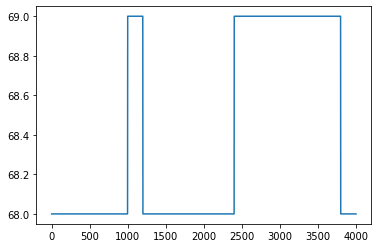

In [12]:
HR = vals['HR']
nHR = vals['nHR']

np.nanmean(HR[:30*SRATE]) / np.nanmean(nHR[-30*SRATE:]) - 1

plt.plot(pd.DataFrame(nHR[-40*SRATE:]).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten())

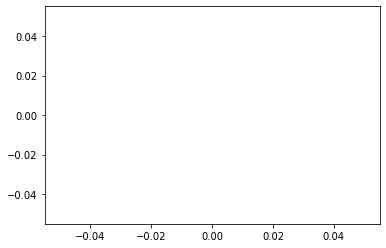

In [63]:
plt.plot(pd.DataFrame(nhr).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten())

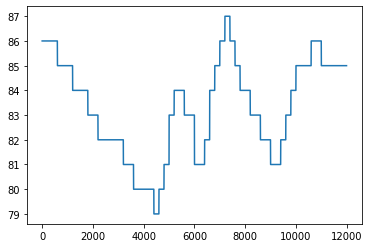

In [20]:
plt.plot(pd.DataFrame(vals['HR']).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten())

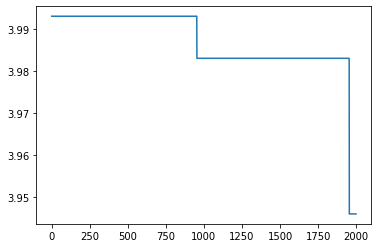

In [14]:
import matplotlib.pyplot as plt

rftn_input = rftn_train[18]
#plt.figure(figsize=(20,10))
plt.plot(rftn_input)

# Validation

In [18]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


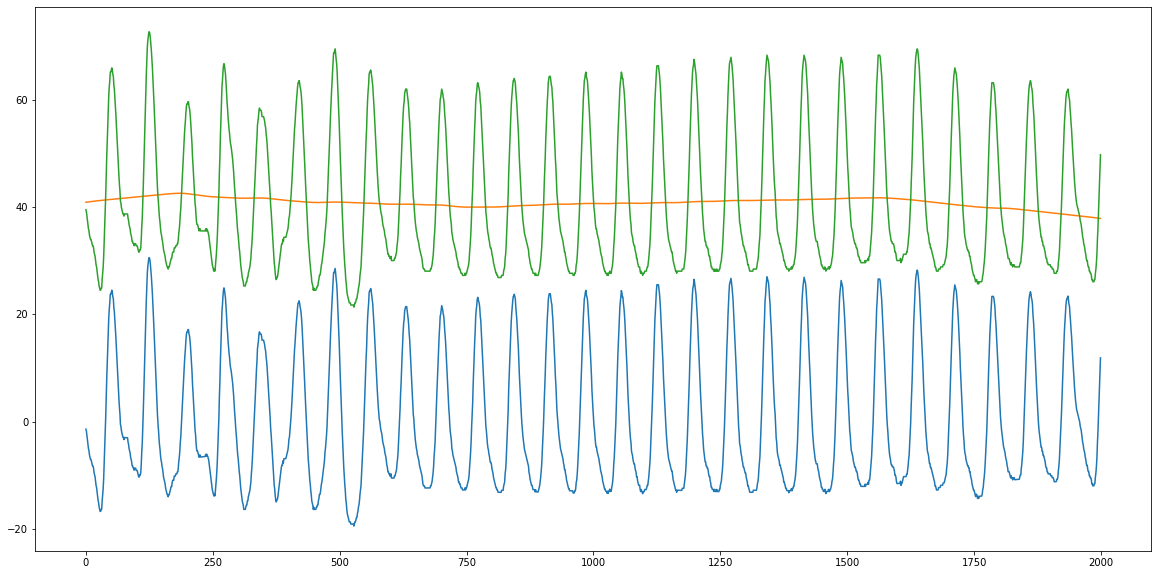

In [47]:
file_path = 'vital_to_np'
caseid = 1791
vals = np.load(f'{file_path}/{caseid}.npz')

ppg_input = vals['PPG'][0:2000]
#plt.figure(figsize=(20,10))
plt.plot(ppg_input)
plt.plot(lowess(ppg_inp))
plt.plot(ppg_inp)

-0.05267069802355574

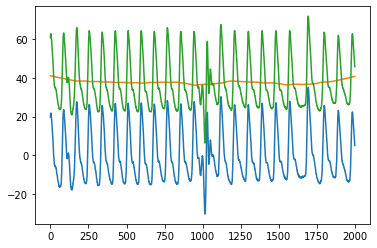

In [21]:
file_path = 'vital_to_np'
caseid = 1791
vals = np.load(f'{file_path}/{caseid}.npz')

ppg_inp = vals['PPG'][0:2000]
ppg_input = ppg_inp - lowess(ppg_inp)
#plt.figure(figsize=(20,10))
plt.plot(ppg_input)
plt.plot(lowess(ppg_inp))
plt.plot(ppg_inp)
np.mean(ppg_input)

## validation of dataset (before intubation)

  segment 1...loaded peak...

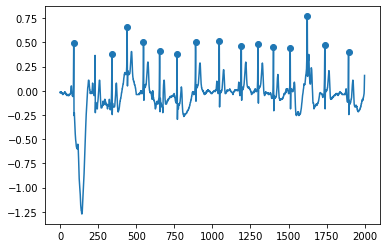

  segment 2...loaded peak...

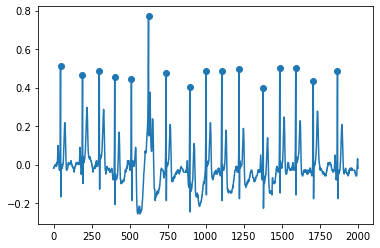

  segment 3...loaded peak...

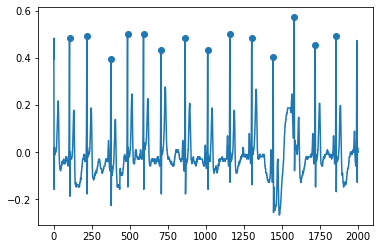

  segment 4...loaded peak...

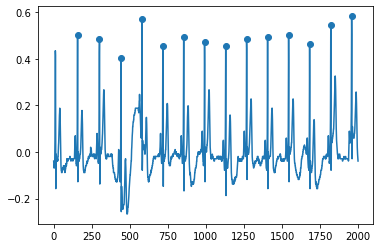

  segment 5...loaded peak...

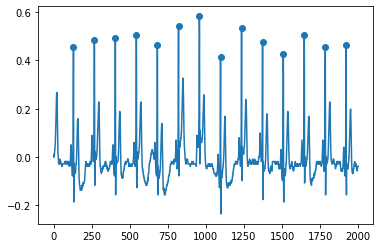

In [23]:
caseid = '5882'
file_path = 'input_60s'
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')


LEN_INPUT = 20
OVERLAP = 10
SRATE = 100
    
ppg_cache = f"cache/peaks/PPG_{SRATE}Hz_1min_seg/" + caseid
ecg_cache = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid    
ecg_cache2 = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid


# 20초 단위로 끊기

for i in range(5):
    #i = 1
    print('  segment', i+1, end='')
    start_idx = i*OVERLAP*SRATE # 500i
    end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000


    ### non-event input ###
    seg_ppg = vals['nPPG'][start_idx:end_idx]
    seg_ecg = vals['nECG'][start_idx:end_idx]


    ## 1. 결측치 처리 ##             
    # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        print('too much missing data')



    ## 2. Noise 처리 ##
    # peak detection
    if os.path.exists(ppg_cache+'_n{}'.format(i+1)):
        _, ppg_peak = pickle.load(open(ppg_cache+'_n{}'.format(i+1), 'rb'))
        ecg_peak = pickle.load(open(ecg_cache+'_n{}'.format(i+1), 'rb'))
        print('...loaded peak...', end='')


    else:
        try:
            min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


        except Exception as e:
            print('error of', e)
            error_list.append(caseid)


        if len(ppg_peak)==0:
            print('no peak')


    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak



    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        print('too less peaks')

        
    chan = 'ECG'
    if chan == 'PPG':
        plt.plot(seg_ppg)
        plt.scatter(idx_ppg_peak, seg_ppg[idx_ppg_peak])
        plt.show()
        
    if chan == 'ECG':
        plt.plot(seg_ecg)
        plt.scatter(idx_ecg_peak, seg_ecg[idx_ecg_peak])
        plt.show()        

## validation of dataset (after intubation)

  segment 1...loaded peak...

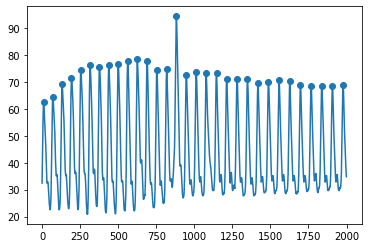

  segment 2...loaded peak...too less peaks


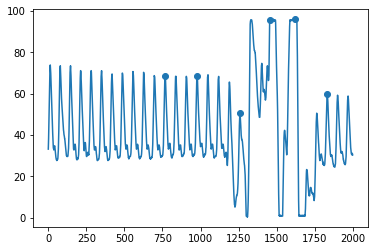

  segment 3...loaded peak...

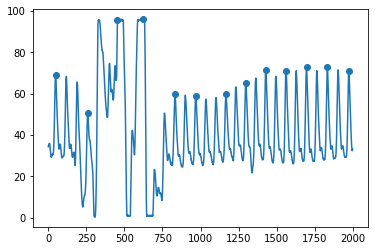

  segment 4...loaded peak...

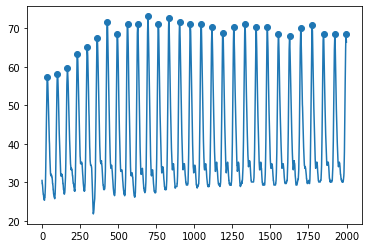

  segment 5...loaded peak...

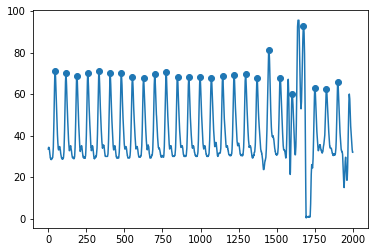

In [20]:
caseid = '373'
file_path = 'input_60s'
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')


LEN_INPUT = 20
OVERLAP = 10
SRATE = 100
    
ppg_cache = f"cache/peaks/PPG_{SRATE}Hz_1min_seg/" + caseid
ecg_cache = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid    
ecg_cache2 = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid


# 20초 단위로 끊기

for i in range(5):
    #i = 1
    print('  segment', i+1, end='')
    start_idx = i*OVERLAP*SRATE # 500i
    end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000


    ### non-event input ###
    seg_ppg = vals['PPG'][start_idx:end_idx]
    seg_ecg = vals['ECG'][start_idx:end_idx]


    ## 1. 결측치 처리 ##             
    # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        print('too much missing data')



    ## 2. Noise 처리 ##
    # peak detection
    if os.path.exists(ppg_cache+'_{}'.format(i+1)):
        _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
        ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
        print('...loaded peak...', end='')


    else:
        try:
            min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


        except Exception as e:
            print('error of', e)
            error_list.append(caseid)


        if len(ppg_peak)==0:
            print('no peak')


    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak



    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        print('too less peaks')

    plt.plot(seg_ppg)
    plt.scatter(idx_ppg_peak, seg_ppg[idx_ppg_peak])
    plt.show()

## validation of lowess filtering (22-11-01)


###n0 - Input 5974###


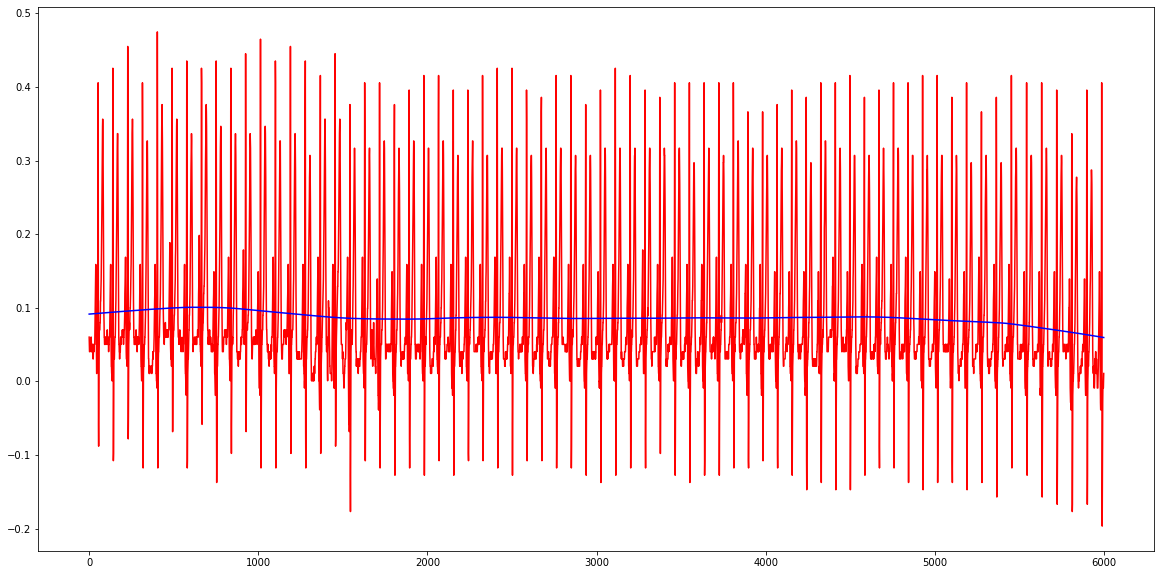


###n1 - Input 801###


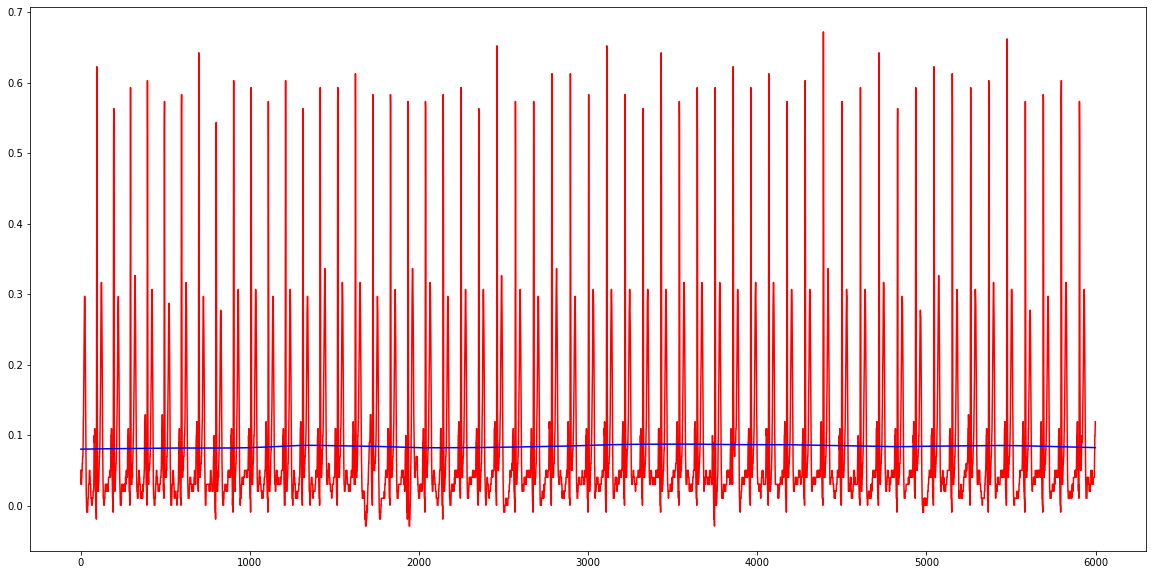


###n2 - Input 2790###


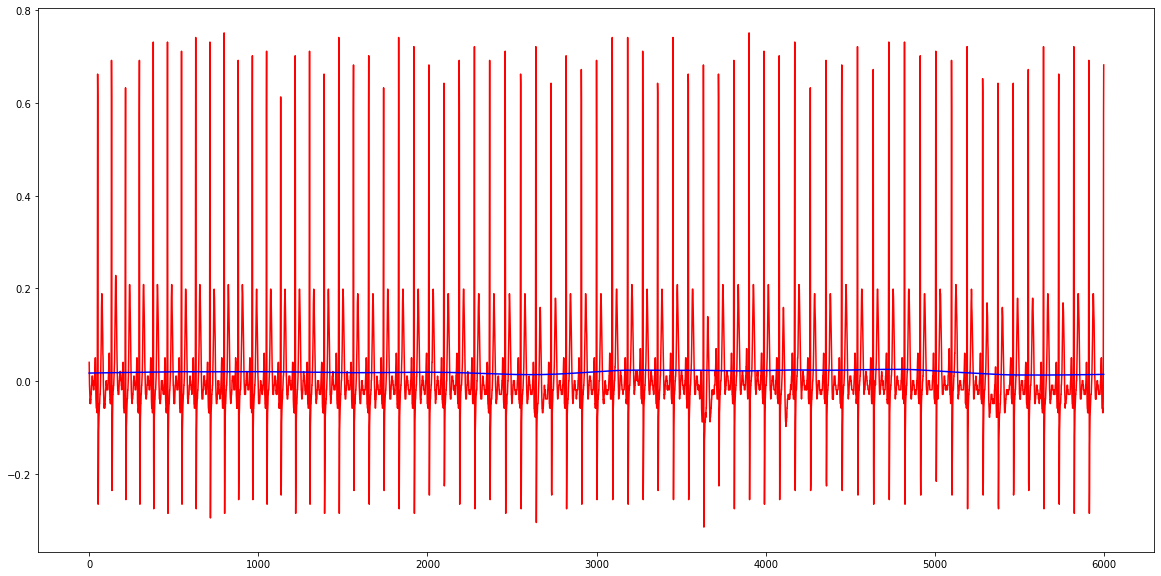


###n3 - Input 1413###


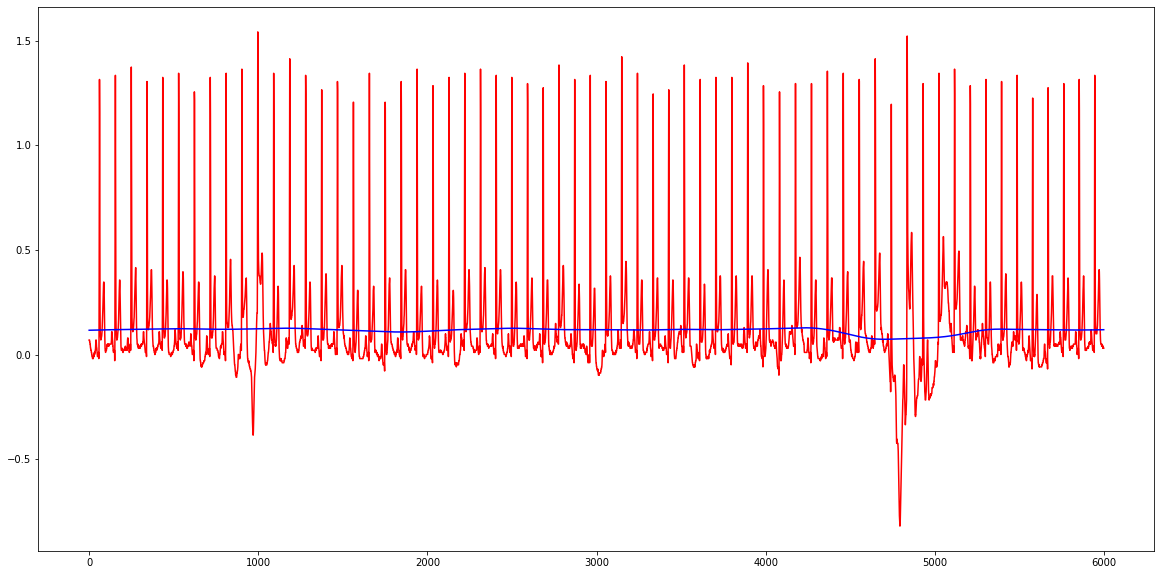


###n4 - Input 4057###


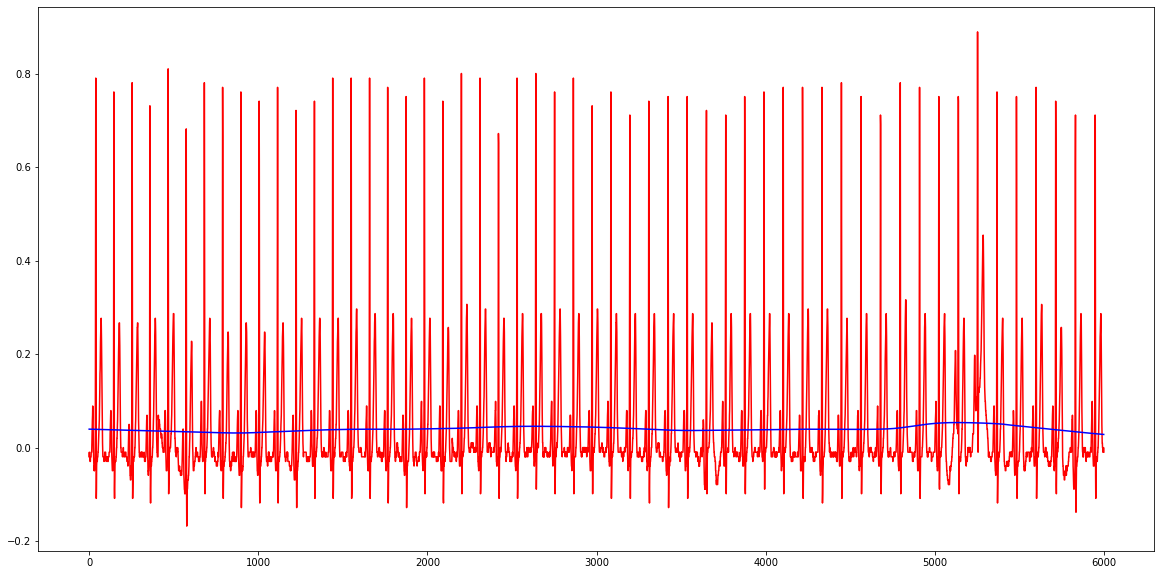


###n5 - Input 1698###


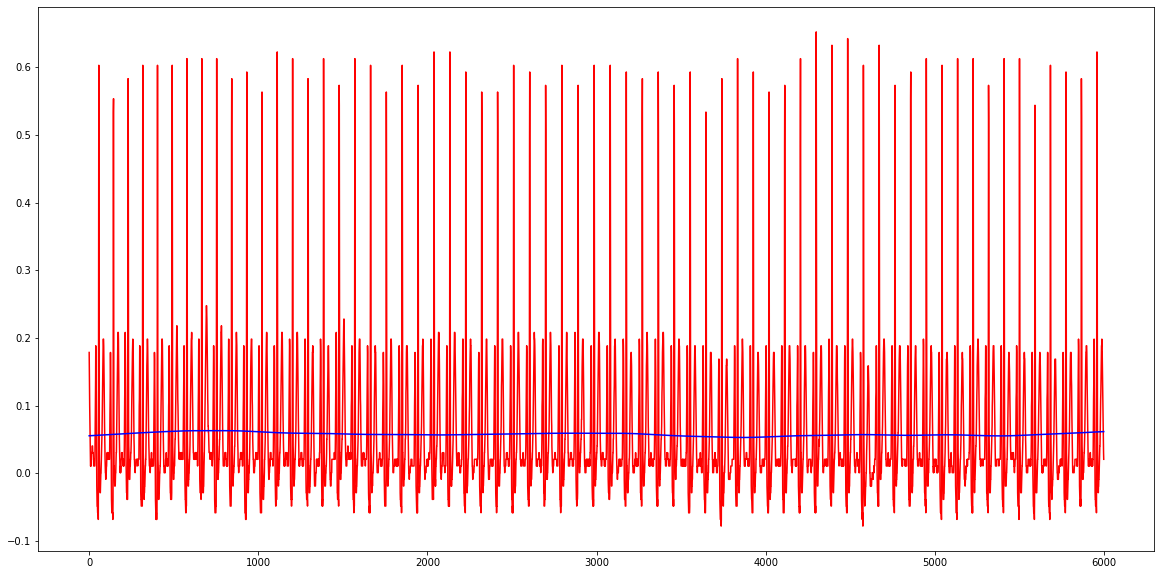


###n6 - Input 2084###

###n7 - Input 845###

###n8 - Input 83###

###n9 - Input 5976###


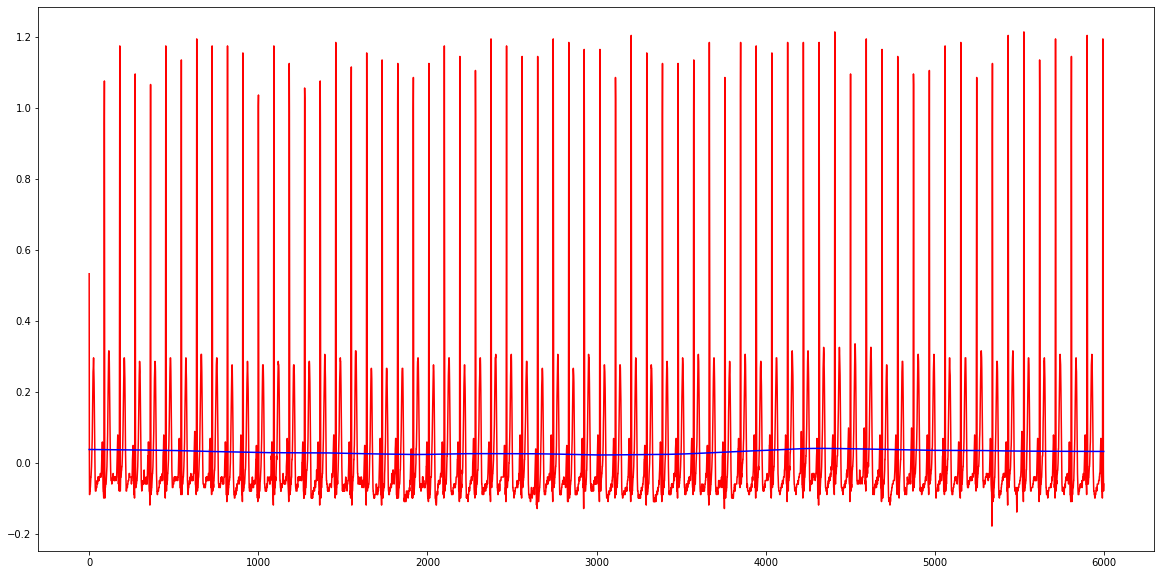


###n10 - Input 3923###

###n11 - Input 1349###

###n12 - Input 3907###

###n13 - Input 4108###

###n14 - Input 263###


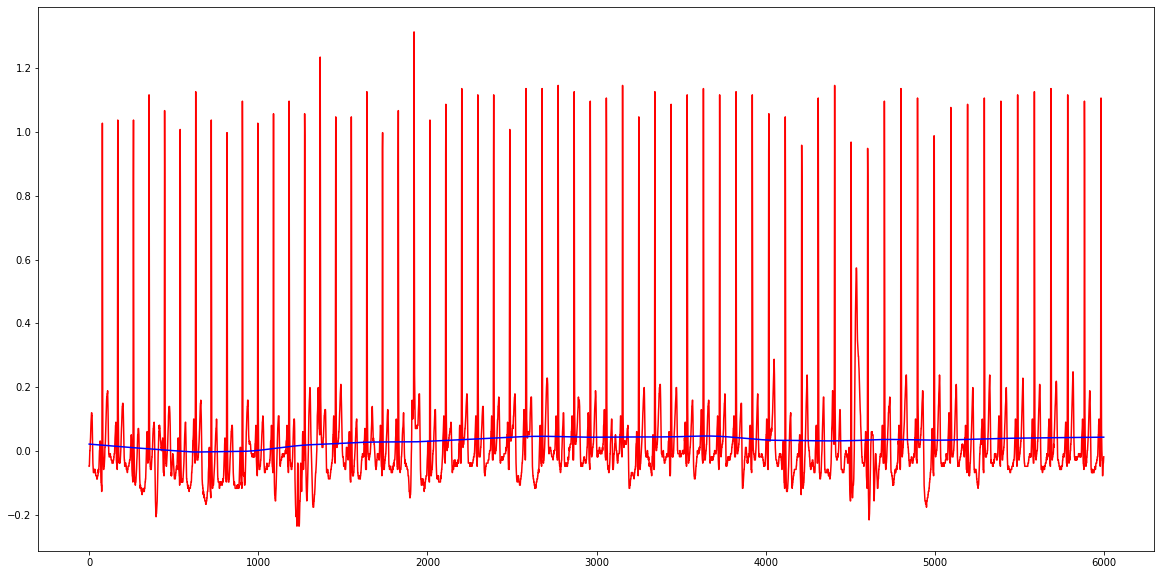


###n15 - Input 4885###


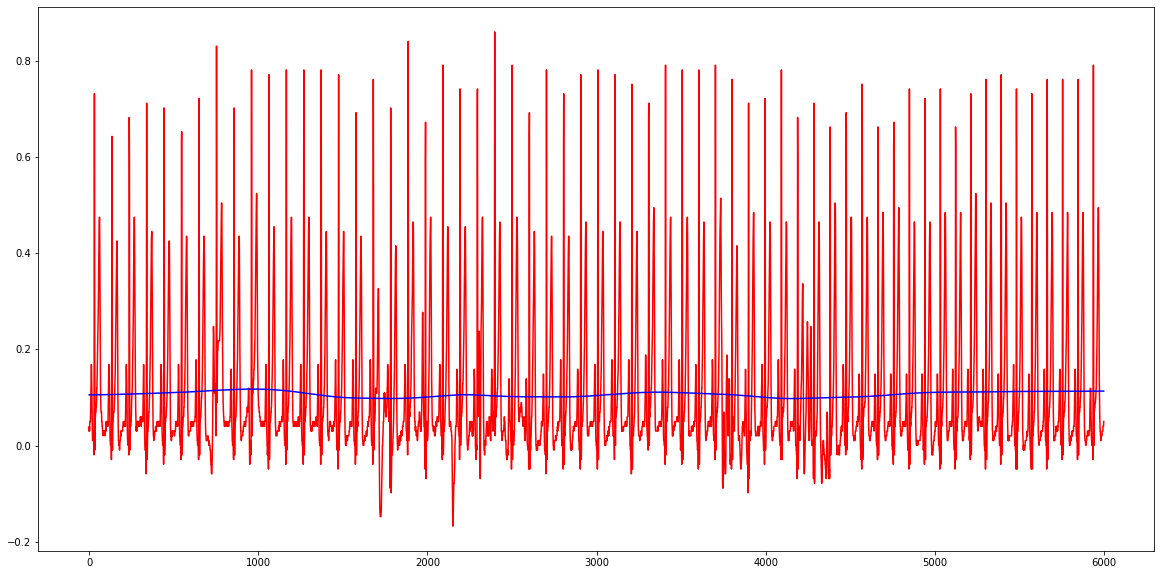


###n16 - Input 104###

###n17 - Input 684###

###n18 - Input 121###


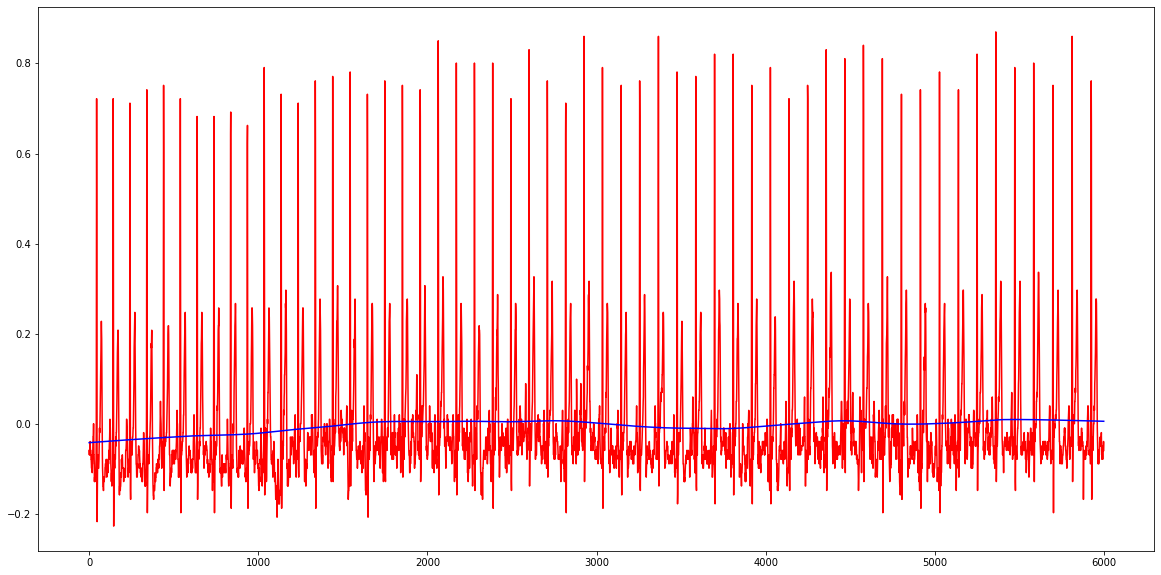


###n19 - Input 2413###

###n20 - Input 6095###

###n21 - Input 3991###

###n22 - Input 584###

###n23 - Input 3417###

###n24 - Input 4503###

###n25 - Input 2419###

###n26 - Input 6278###


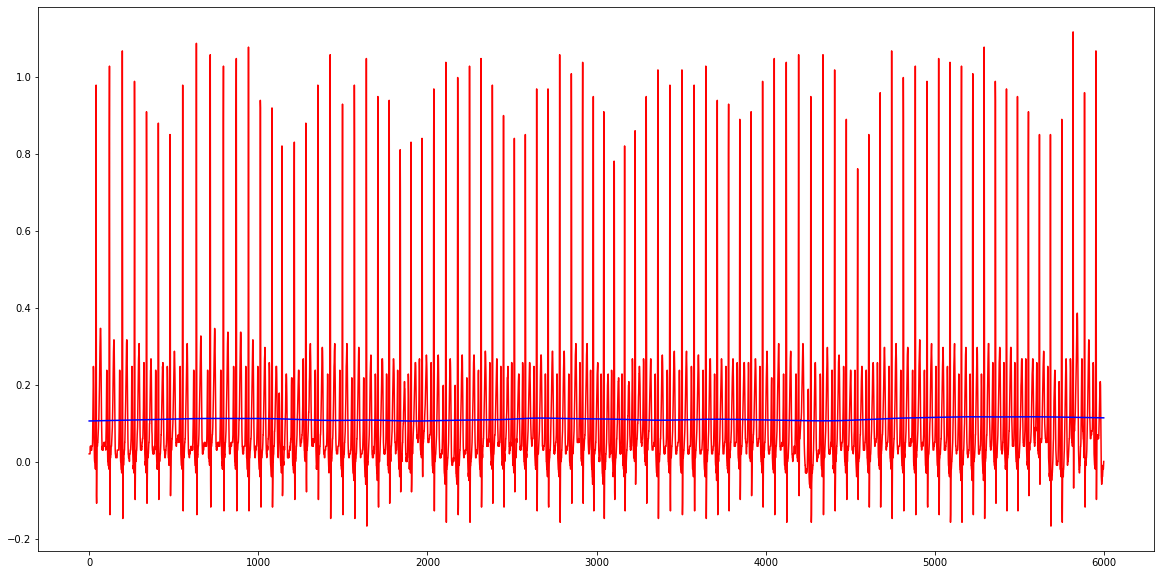


###n27 - Input 6128###

###n28 - Input 1906###


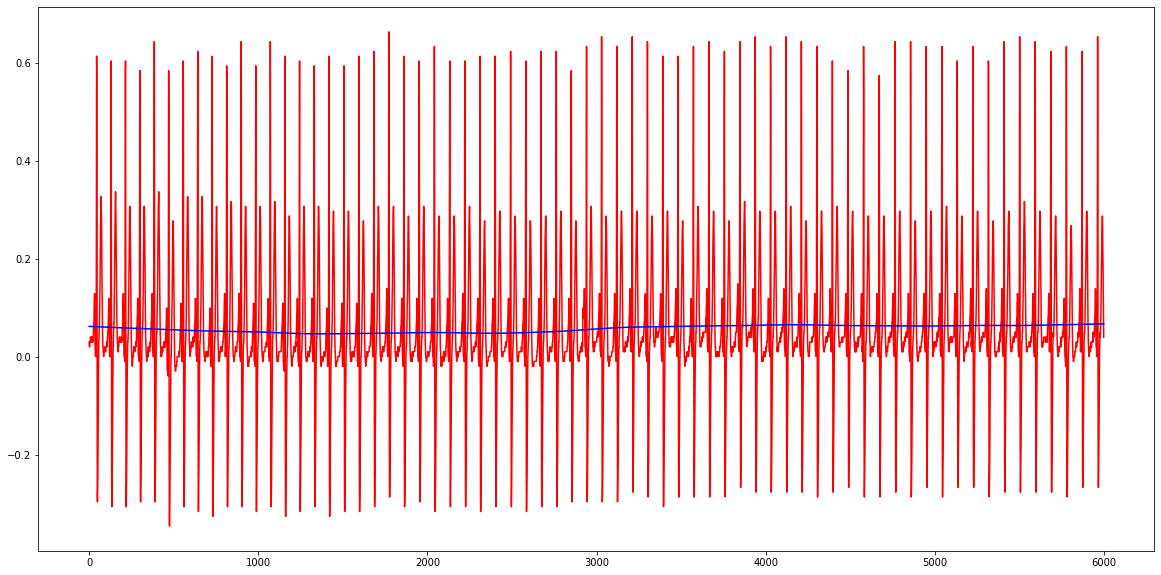


###n29 - Input 1490###

###n30 - Input 4868###


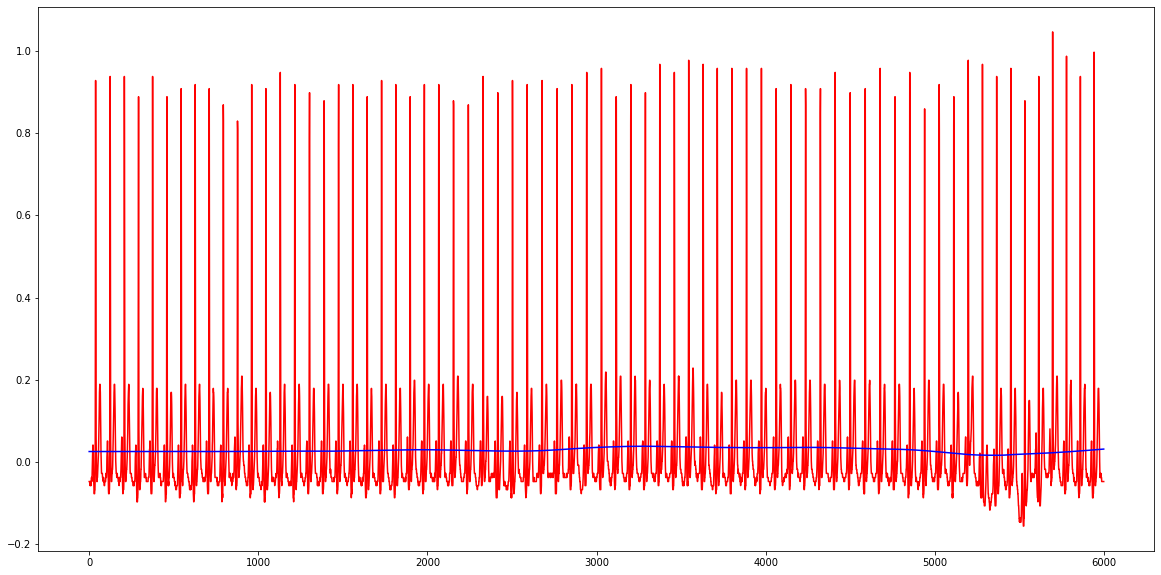


###n31 - Input 1992###

###n32 - Input 5566###

###n33 - Input 1030###

###n34 - Input 2770###

###n35 - Input 3729###

###n36 - Input 1638###

###n37 - Input 1080###

###n38 - Input 1251###

###n39 - Input 4477###


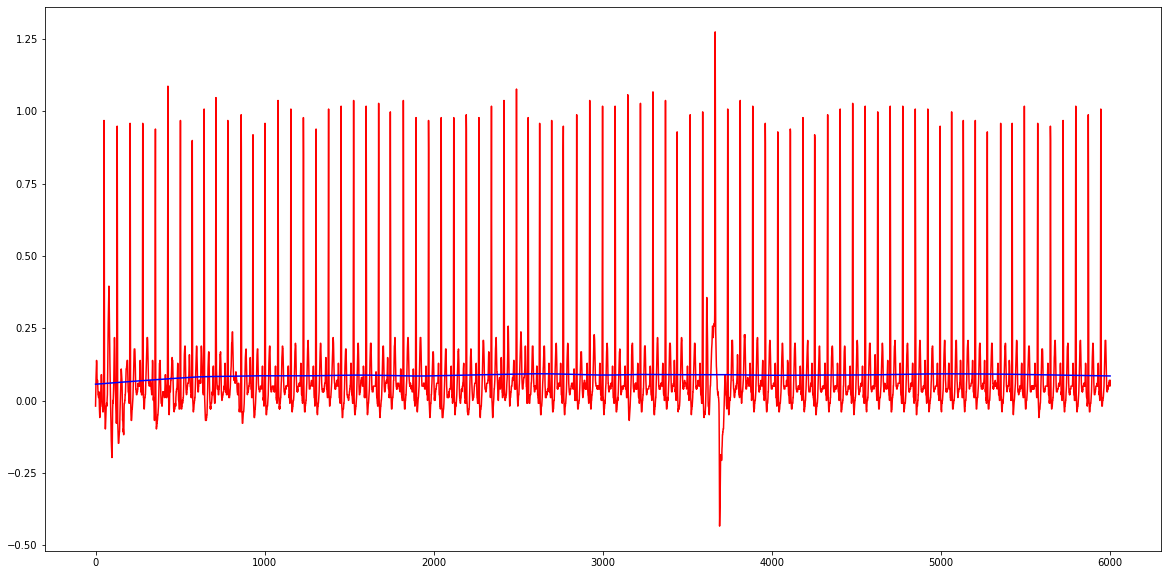


###n40 - Input 5772###

###n41 - Input 794###

###n42 - Input 5686###


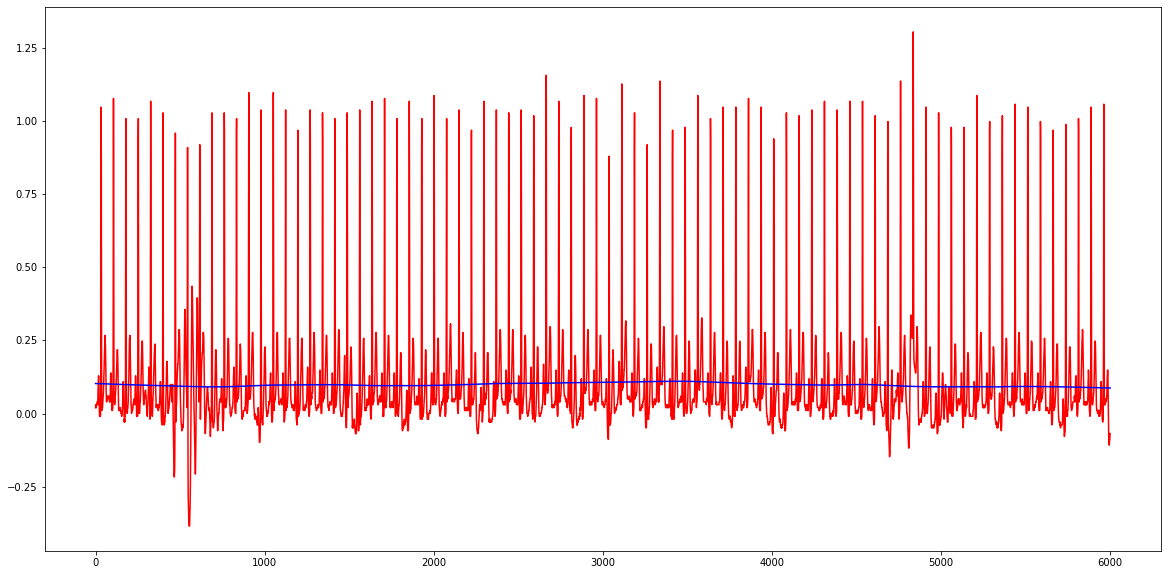


###n43 - Input 2415###

###n44 - Input 5656###

###n45 - Input 6125###

###n46 - Input 5365###

###n47 - Input 6132###

###n48 - Input 4811###

###n49 - Input 5731###

###n50 - Input 1643###


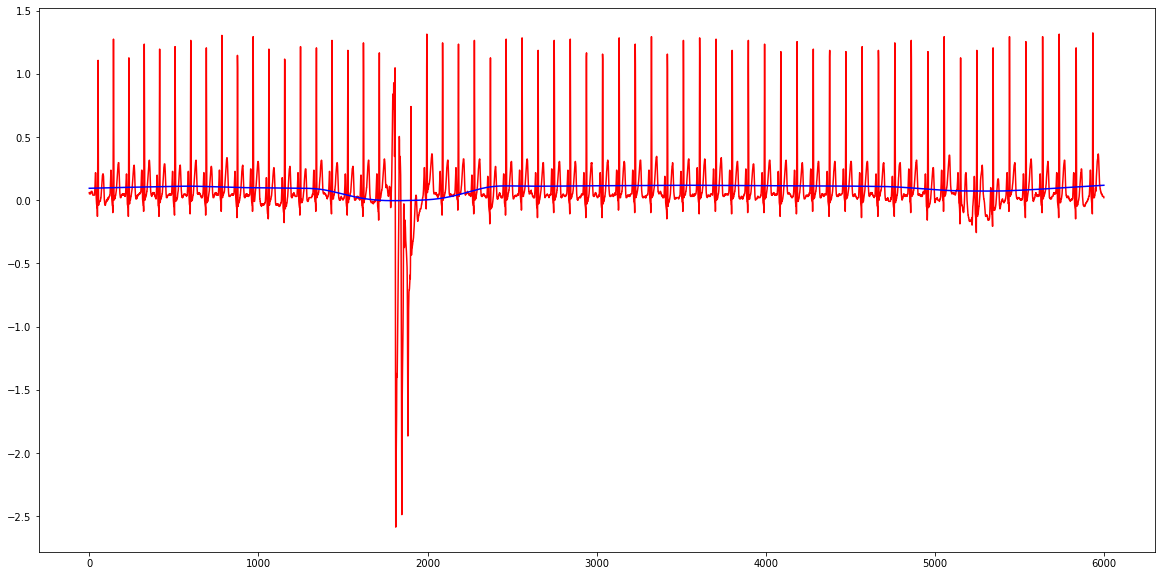


###n51 - Input 4021###

###n52 - Input 4606###

###n53 - Input 476###


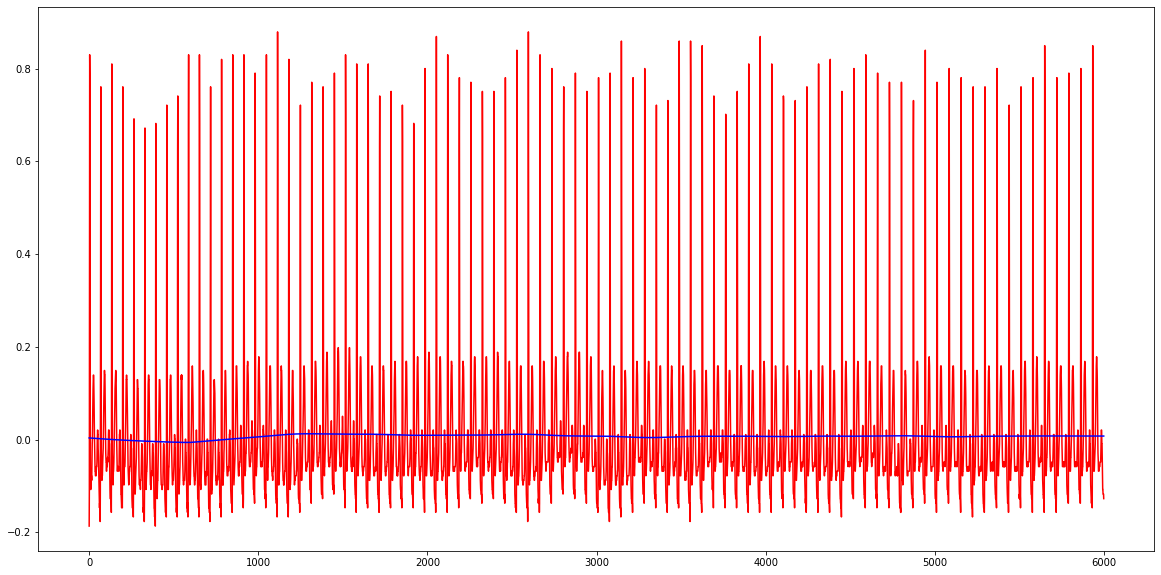


###n54 - Input 1542###


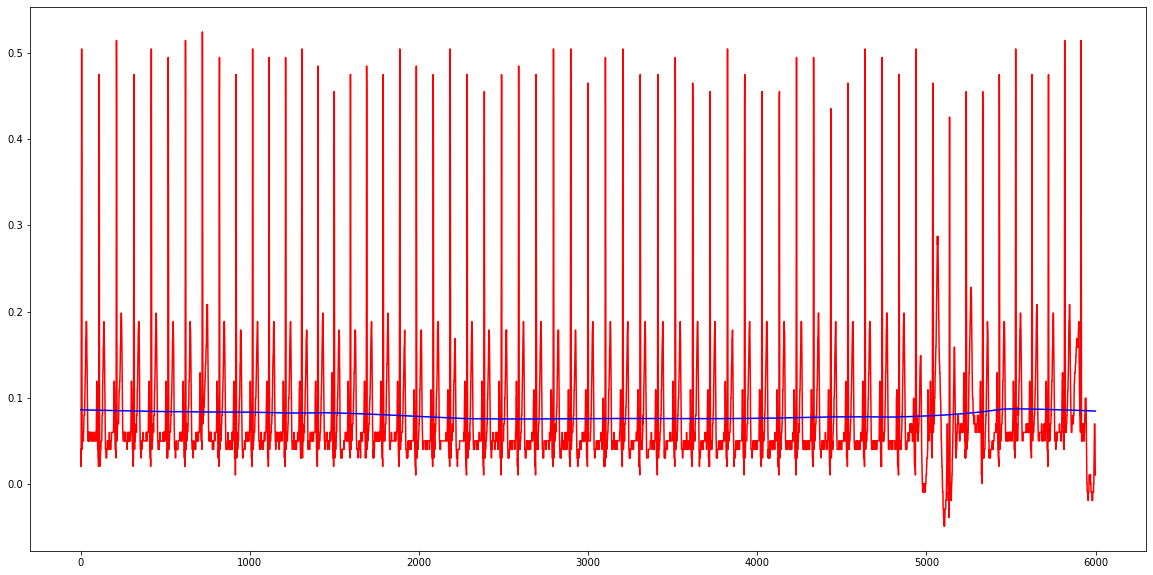


###n55 - Input 3144###

###n56 - Input 2704###


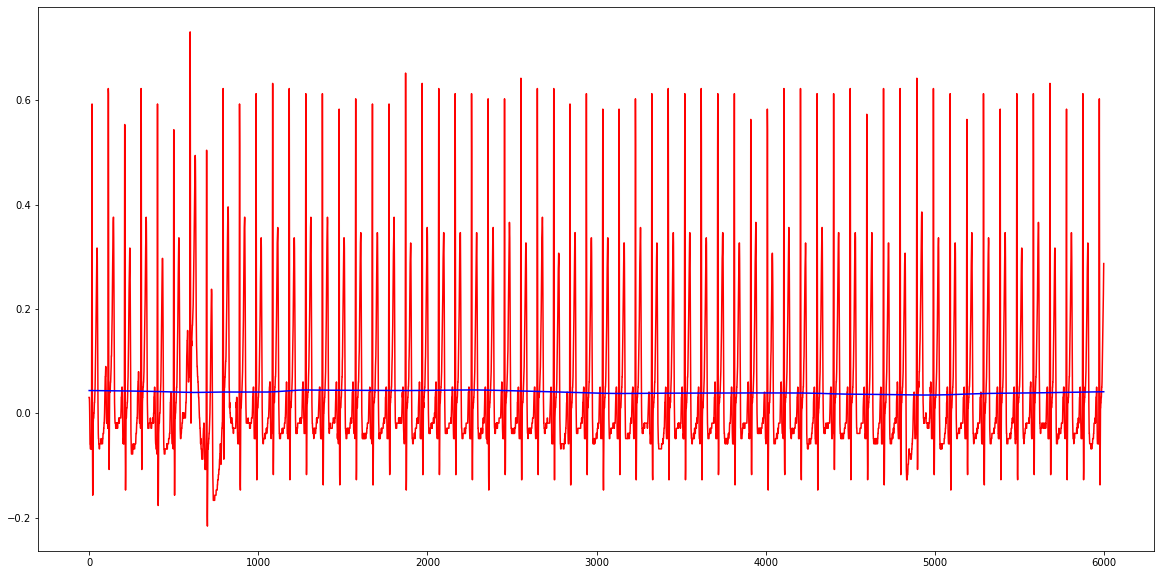


###n57 - Input 3372###


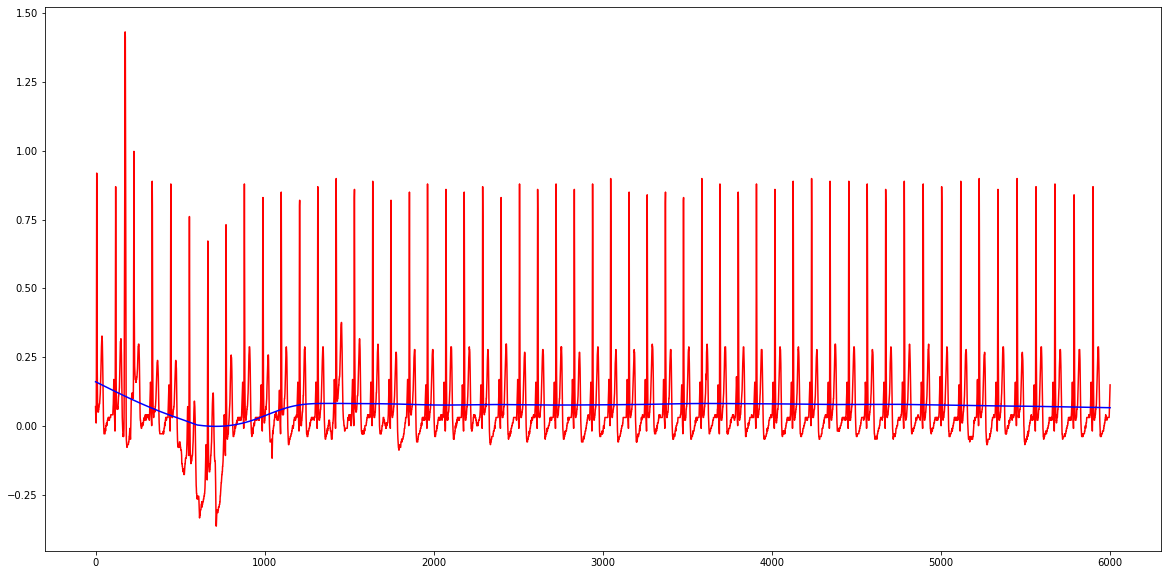


###n58 - Input 6319###

###n59 - Input 5308###

###n60 - Input 2879###


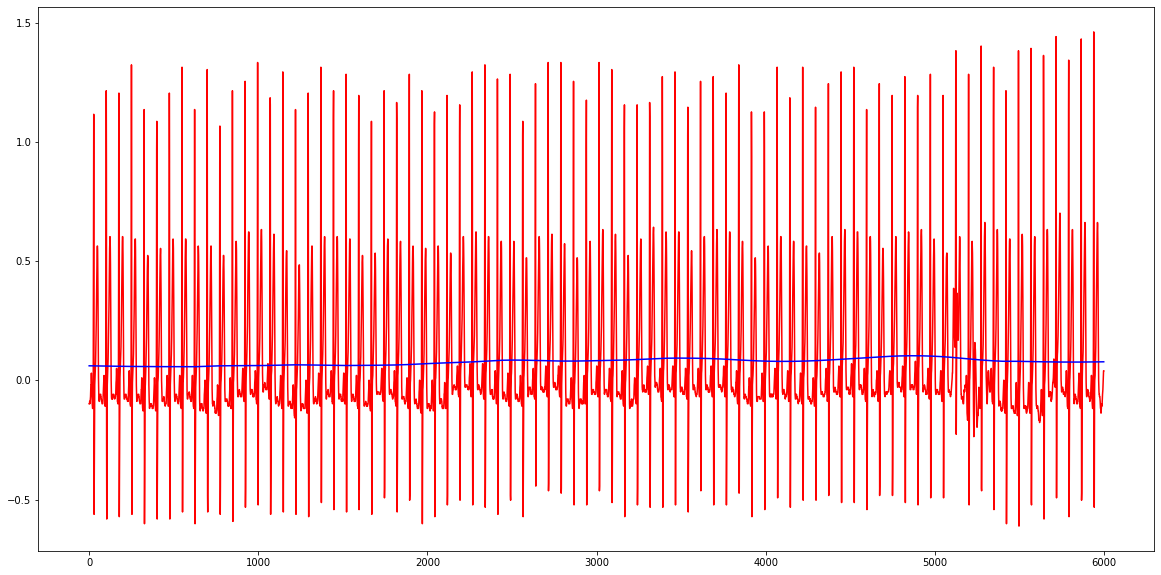


###n61 - Input 3350###


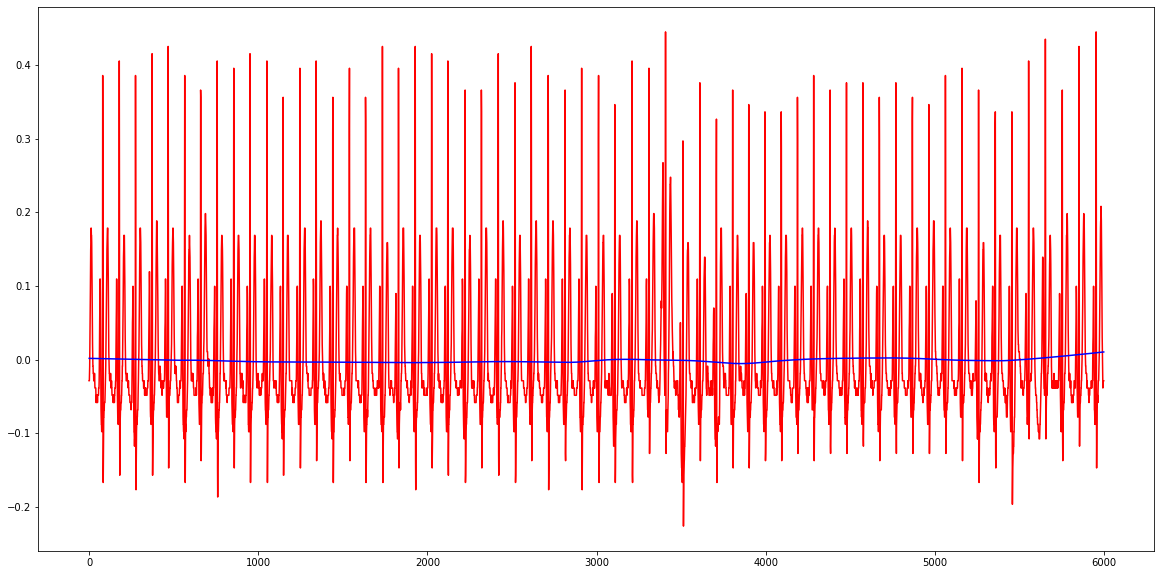


###n62 - Input 5938###

###n63 - Input 4788###

###n64 - Input 5401###

###n65 - Input 3766###

###n66 - Input 718###

###n67 - Input 13###

###n68 - Input 725###

###n69 - Input 101###

###n70 - Input 668###

###n71 - Input 4478###


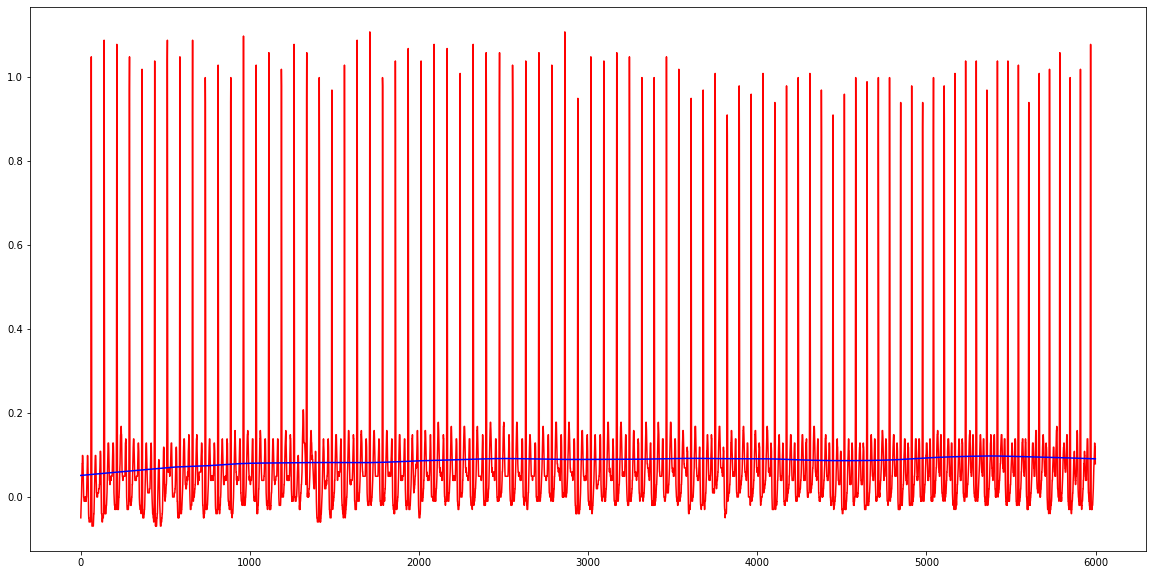


###n72 - Input 2554###


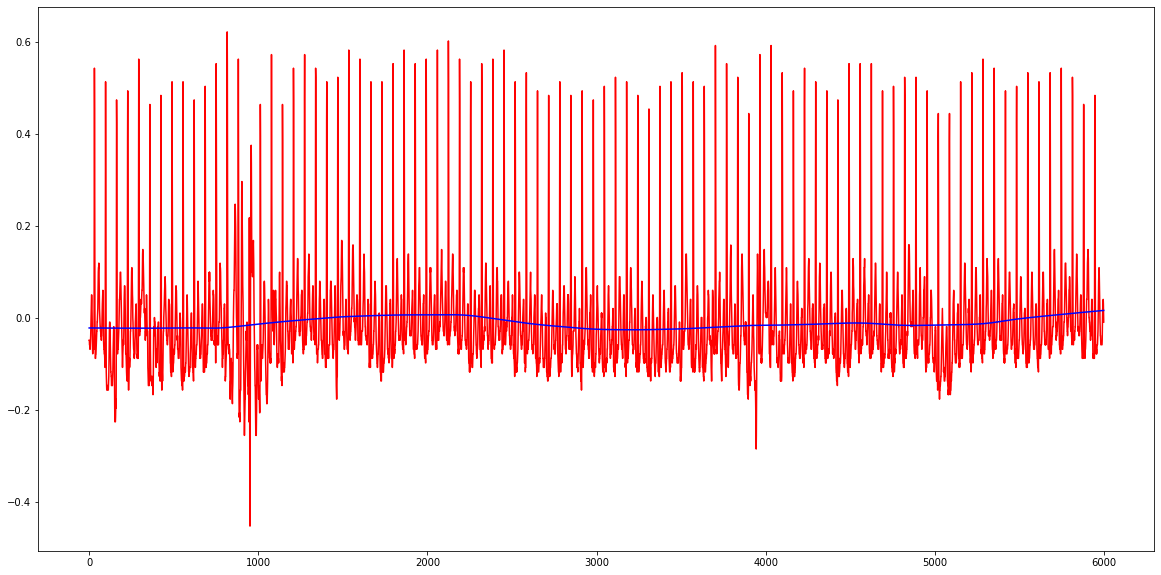


###n73 - Input 4472###

###n74 - Input 382###

###n75 - Input 1933###

###n76 - Input 5599###

###n77 - Input 4812###


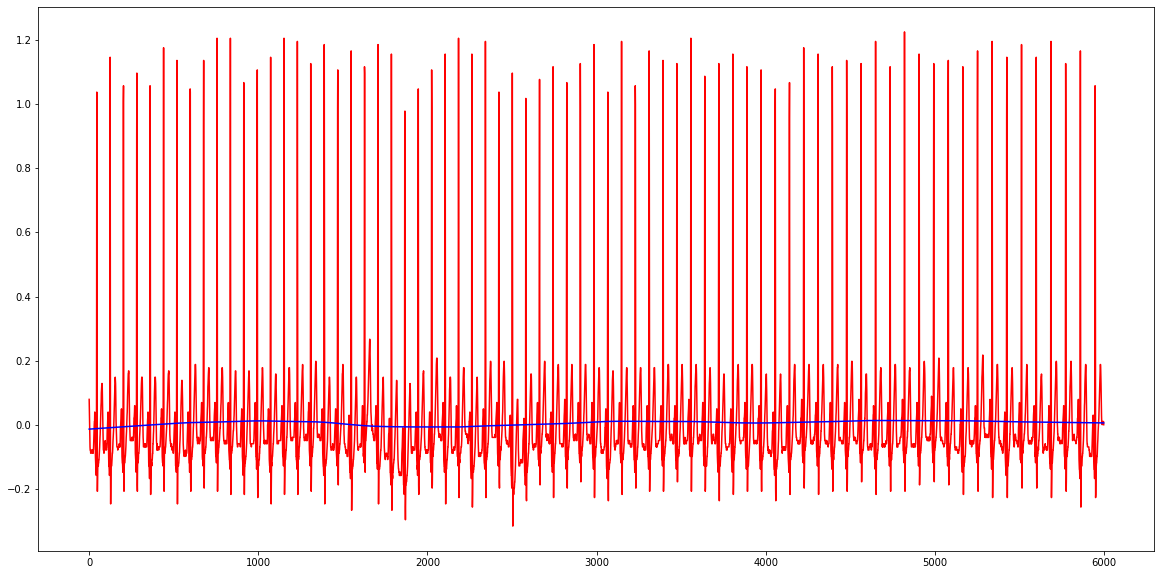


###n78 - Input 3600###

###n79 - Input 2049###

###n80 - Input 2016###

###n81 - Input 5489###

###n82 - Input 3253###


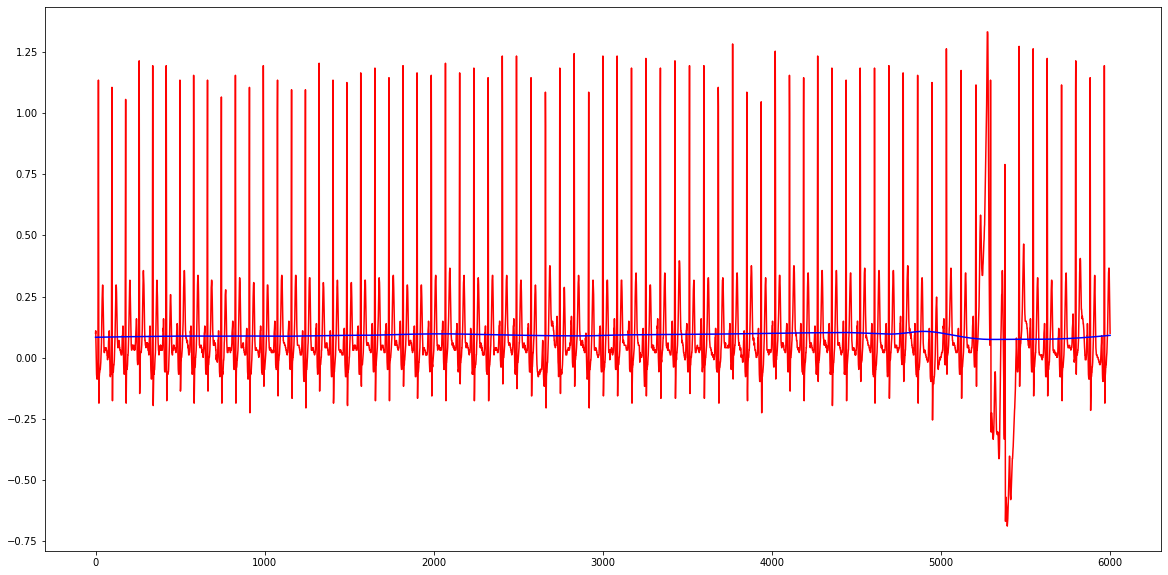


###n83 - Input 699###

###n84 - Input 4228###


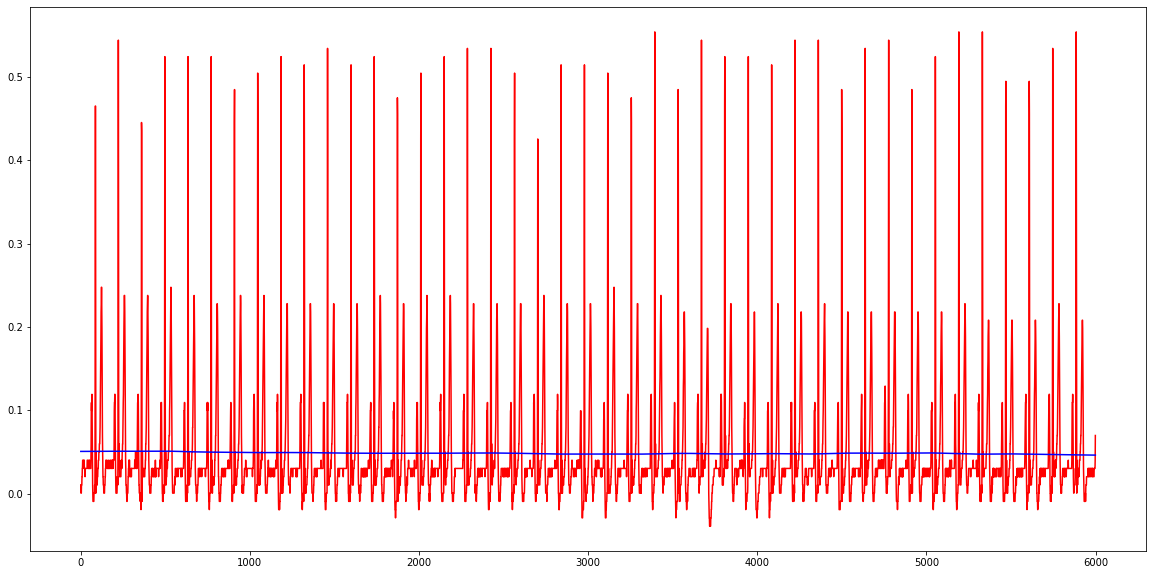


###n85 - Input 4073###

###n86 - Input 4194###


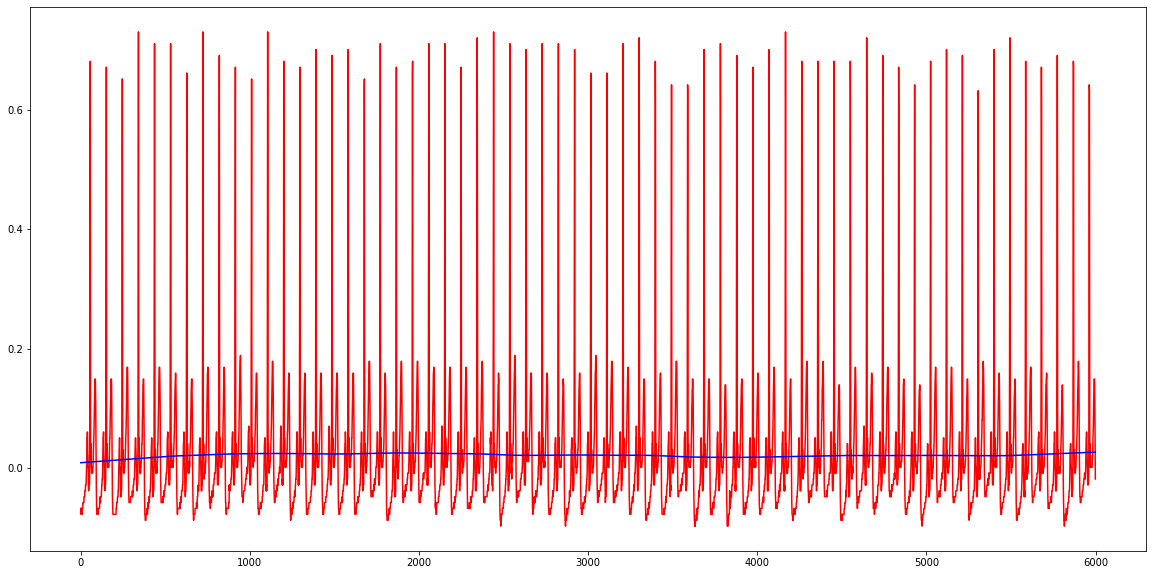


###n87 - Input 4816###


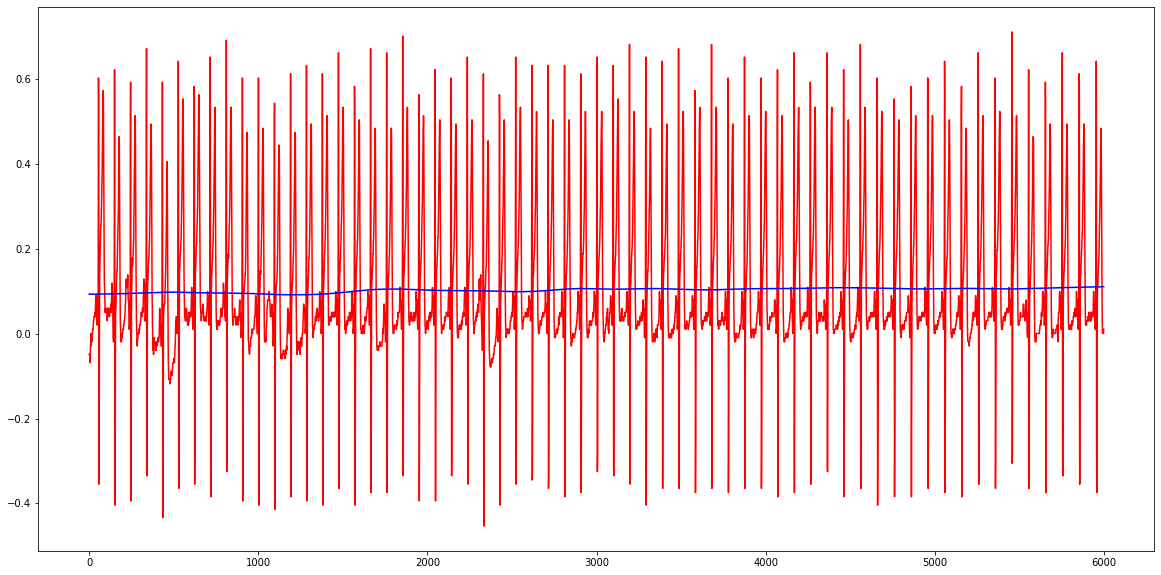


###n88 - Input 4634###

###n89 - Input 2120###

###n90 - Input 4140###


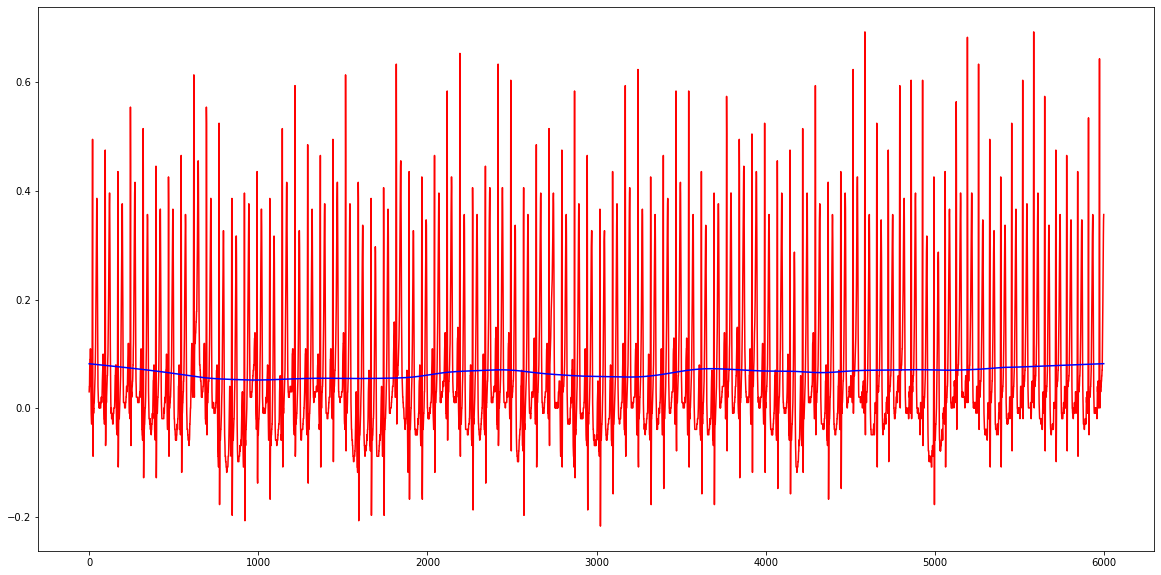


###n91 - Input 3679###


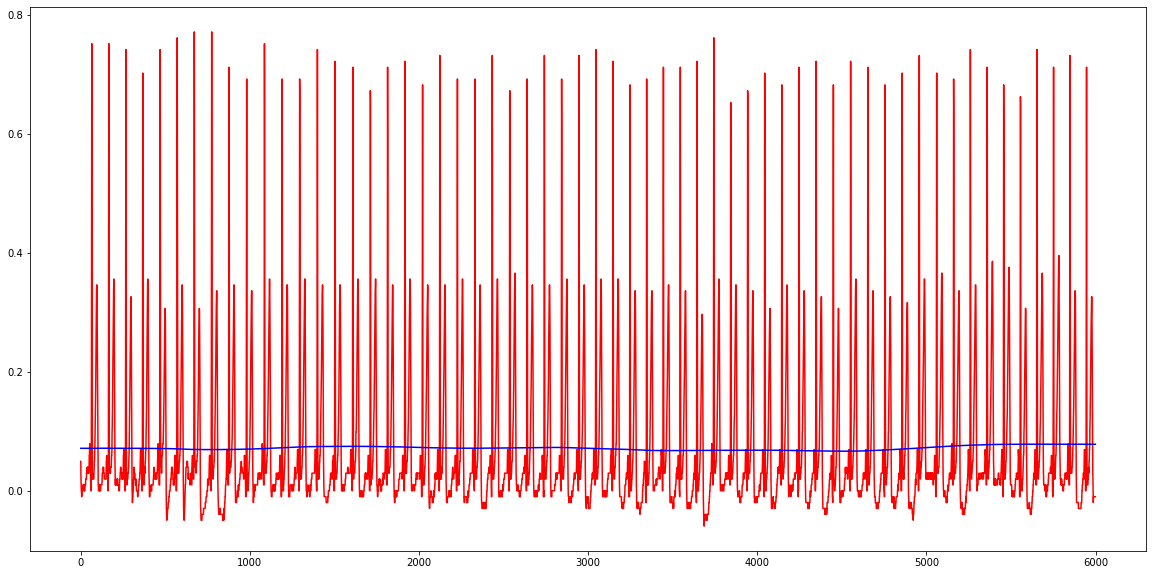


###n92 - Input 4722###

###n93 - Input 1161###


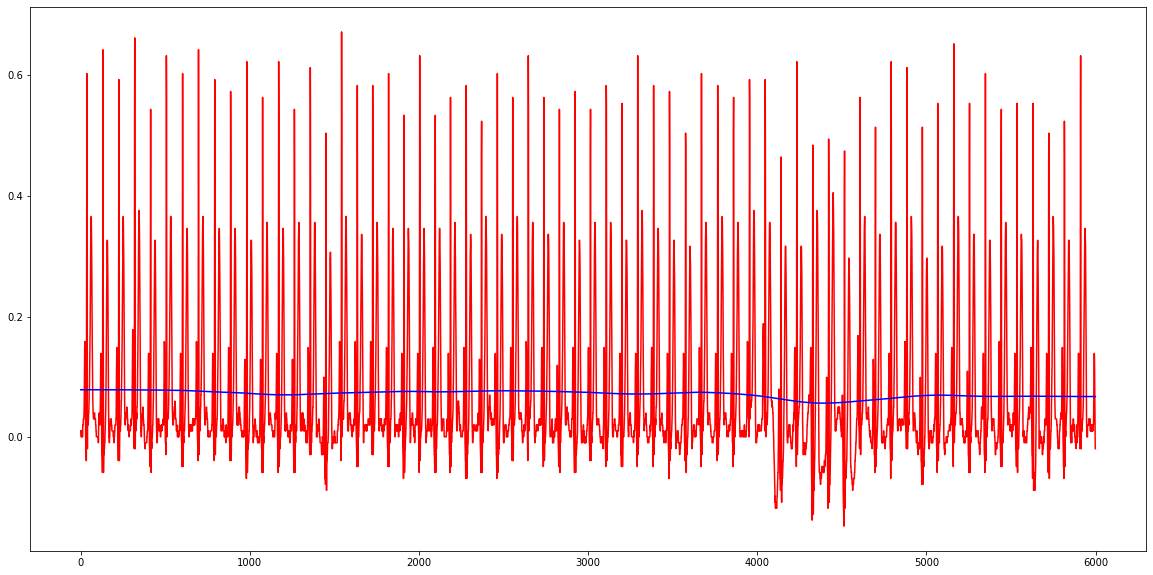


###n94 - Input 369###

###n95 - Input 706###

###n96 - Input 4091###

###n97 - Input 3626###


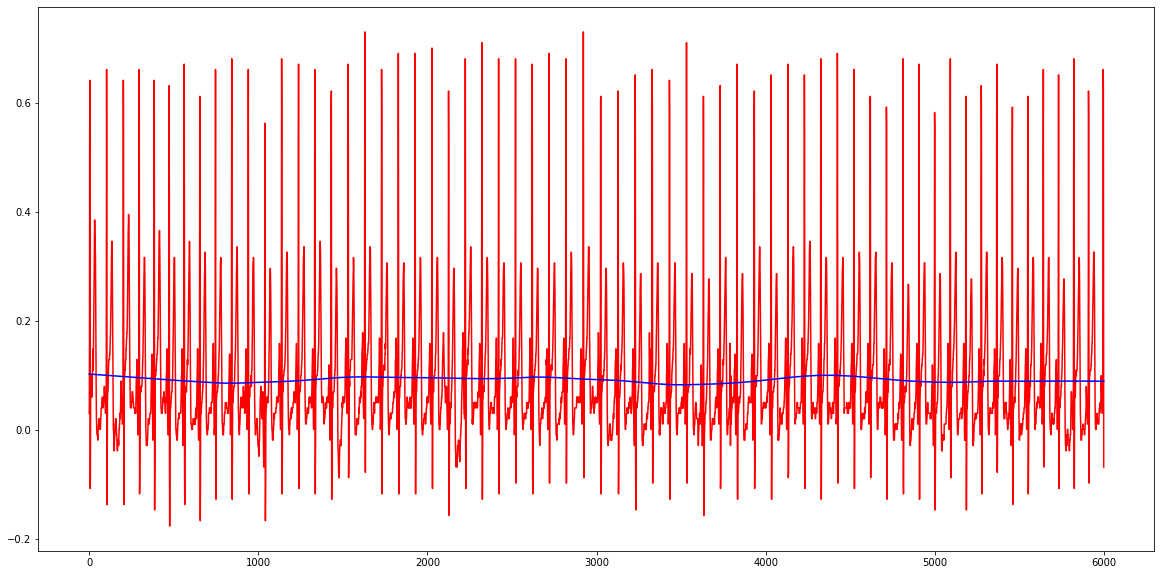


###n98 - Input 5572###

###n99 - Input 4190###


In [12]:
import itertools as it
import os
import pandas as pd
import numpy as np
import random
import vitaldb
#from pyvital2 import arr
from pyvital.pyvital import arr
import pickle
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import time, datetime


SRATE = 100
LEN_INPUT = 60
OVERLAP = 10
LEN_PER_PRE = 60
LEN_PER_POST = 60

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)

def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


start = time.time()

# input - filtering, saving
LEN_INPUT = 60
OVERLAP = 0
input_path = f"../DL_model/dataset/ne{LEN_PER_PRE}s-e{LEN_PER_POST}s-len{LEN_INPUT}-{OVERLAP}/"
if not os.path.exists('../DL_model/dataset'):
    os.mkdir('../DL_model/dataset')
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])    
    
    
# variables

df_preprocess = pickle.load(open('cache/preprocess/df_preprocess_60s', 'rb'))  
file_path = f'vital_to_np_pd'#_{LEN_PER_PRE}s-{LEN_PER_POST}s'

    
for i in range(0,100):
    row = df_preprocess.loc[i]
    caseid = row['caseid']
    print(f'\n###n{i} - Input {caseid}###')
    
    # vital data 불러오기    
    vals = np.load(f'{file_path}/{caseid}.npz')

    # non-event data
    if row[str(1)][0]:
        ppg_inp = vals['nPPG']
        ecg_inp = vals['nECG']
        rftn = vals['nRFTN']

        ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        rftn = pd.DataFrame(rftn).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()

        # lowess filter 적용
        ppg_input = ppg_inp - lowess(ppg_inp)
        ecg_input = ecg_inp - lowess(ecg_inp)
        
        plt.figure(figsize=(20,10))
        plt.plot(ecg_inp, color = 'r')
        plt.plot(lowess(ecg_inp), color = 'b')
        plt.show()

        #ppg_input = ppg_input - np.nanmean(ppg_input)
        #ecg_input = ecg_input - np.nanmean(ecg_input)
        #ecg_input = (ecg_input - min(ecg_input)) / (max(ecg_input) - min(ecg_input))



###n3 - Input 1413###


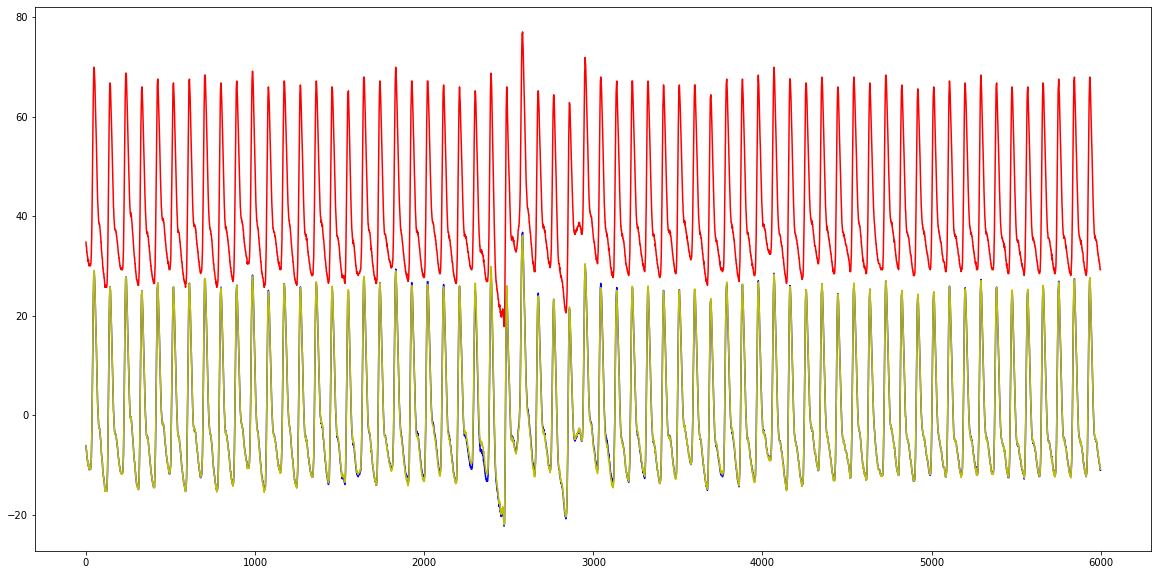

In [44]:
i = 3
row = df_preprocess.loc[i]
caseid = row['caseid']
print(f'\n###n{i} - Input {caseid}###')

# vital data 불러오기    
vals = np.load(f'{file_path}/{caseid}.npz')

# non-event data
if row[str(1)][0]:
    ppg_inp = vals['nPPG']
    ecg_inp = vals['nECG']
    rftn = vals['nRFTN']

    ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    rftn = pd.DataFrame(rftn).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()

    # lowess filter 적용
    ppg_input = ppg_inp - lowess(ppg_inp)
    ecg_input = ecg_inp - lowess(ecg_inp)

    idx_n = 6000
    plt.figure(figsize=(20,10))
    plt.plot(ppg_inp[0:idx_n], color = 'r')
    plt.plot(ppg_inp - lowess(ppg_inp, f=0.2)[0:idx_n], color = 'b')
    plt.plot(ppg_inp - lowess(ppg_inp, f=0.1)[0:idx_n], color = 'y')
    plt.show()


###n87 - Input 4816###


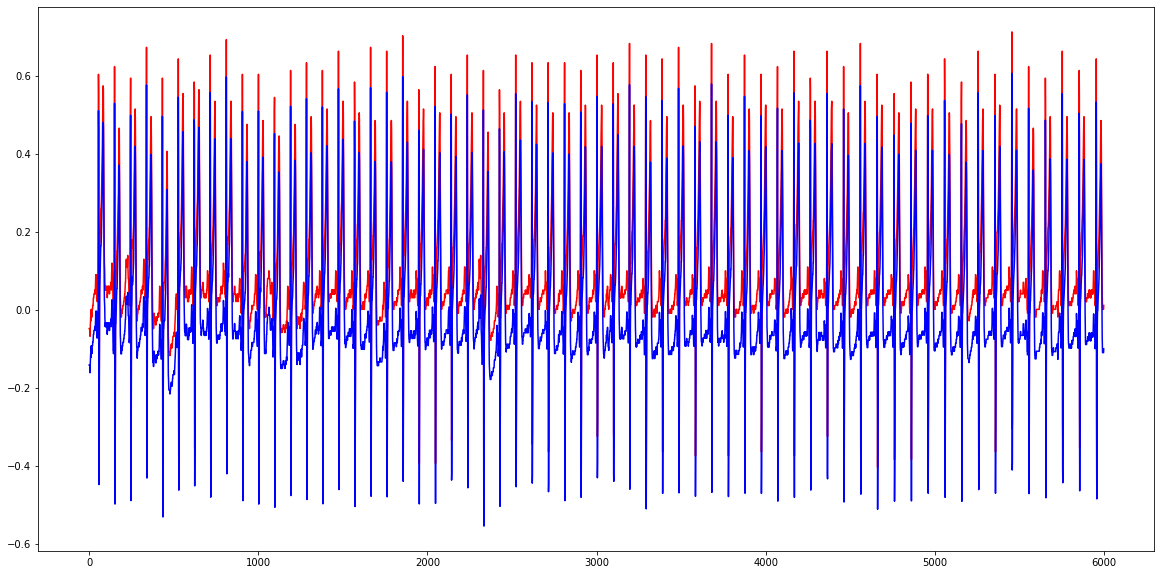

In [48]:
i = 87
row = df_preprocess.loc[i]
caseid = row['caseid']
print(f'\n###n{i} - Input {caseid}###')

# vital data 불러오기    
vals = np.load(f'{file_path}/{caseid}.npz')

# non-event data
if row[str(1)][0]:
    ppg_inp = vals['nPPG']
    ecg_inp = vals['nECG']
    rftn = vals['nRFTN']

    ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    rftn = pd.DataFrame(rftn).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()

    # lowess filter 적용
    ppg_input = ppg_inp - lowess(ppg_inp)
    ecg_input = ecg_inp - lowess(ecg_inp)


    plt.figure(figsize=(20,10))
    plt.plot(ecg_inp[0:6000], color = 'r')
    plt.plot(ecg_inp-lowess(ecg_inp, f=0.2)[0:6000], color = 'b')
    #plt.plot(ecg_inp-lowess(ecg_inp, f=0.12)[0:6000], color = 'y')
    plt.show()

In [2]:
df_preprocess

caseid                                                  1  \
0      5974                [True, [0.0, 0.0, 0.0], [0.0, 0.0]]   
1       801                [True, [0.0, 0.0, 0.0], [0.0, 0.0]]   
2      2790                [True, [0.0, 0.0, 0.0], [0.0, 0.0]]   
3      1413  [True, [0.0, 0.0, 0.0], [0.015873015873015872,...   
4      4057  [True, [0.0, 0.0, 0.0], [0.03773584905660377, ...   
...     ...                                                ...   
2678   5882  [False, [0.0, 0.0, 0.0], [0.15384615384615385,...   
2679    927              [False, [0.0, 0.0, 0.0], [0.25, 1.0]]   
2680    373  [False, [0.0, 0.0, 0.0], [0.0, 0.4918032786885...   
2681   2530  [True, [0.0, 0.0, 0.0], [0.07407407407407407, ...   
2682   1354  [True, [0.0, 0.0, 0.0], [0.0, 0.05797101449275...   

                                                      2   age gender  
0     [True, [0.0, 0.0, 0.0], [0.006024096385542169,...  49.0      F  
1     [False, [0.0, 0.0, 0.0], [0.10052910052910052,...  62.0      F  
2     [True, [0.0, 0.0, 0.0], [0.0, 0.04166666666666...  60.0      F  
3     [False, [0.0, 0.0, 0.0], [0.7835820895522388, ...  48.0      M  
4     [True, [0.0, 0.0, 0.0], [0.009259259259259259,...  50.0      F  
...                                                 ...   ...    ...  
2678  [False, [0.0, 0.0, 0.0], [0.028169014084507043...  61.0      M  
2679  [False, [0.0, 0.0, 0.0], [0.020202020202020204...  60.0      M  
2680  [False, [0.0, 0.0, 0.0], [0.10404624277456648,...  42.0      F  
2681  [True, [0.0, 0.0, 0.0], [0.007633587786259542,...  62.0      M  
2682  [False, [0.0, 0.0, 0.0], [0.08536585365853659,...  61.0      F  

[2683 rows x 5 columns]

In [50]:
df_preprocess.loc[3]['1']

[True, [0.0, 0.0, 0.0], [0.015873015873015872, 0.07936507936507936]]

## validation of preprocessing (ecg quality index)

In [55]:
# path for cache
if not os.path.exists('./cache'):
    os.mkdir('./cache')
if not os.path.exists('./cache/peaks'):
    os.mkdir('./cache/peaks')
if not os.path.exists(f"cache/peaks/PPG_{SRATE}Hz_1min_seg"):
    os.mkdir(f"cache/peaks/PPG_{SRATE}Hz_1min_seg")
if not os.path.exists(f"cache/peaks/ECG_{SRATE}Hz_1min_seg"):
    os.mkdir(f"cache/peaks/ECG_{SRATE}Hz_1min_seg")        
if not os.path.exists('./cache/preprocess'):
    os.mkdir('./cache/preprocess')


# dataframe to save preprocessing info
column_list = ['caseid'] + ['1', '2']
df_preprocess = pd.DataFrame(columns = column_list)


# set variables
caseids = os.listdir(file_path)
error_list = []
f_num = 0
initial = f_num
interval = len(caseids)
corr_ppg, corr_ecg = [], []


caseid = '927'
print(f'\n###caseid {caseid}###')


# vital data 불러오기    
vals = np.load(f'{file_path}/{caseid}.npz')

if not np.mean(~np.isnan(vals['RFTN'])):
    print('no RFTN value')
    #continue

#dataframe에 새로운 행 만들기
#df_preprocess.loc[f_num-1,'caseid'] = caseid

ppg_cache = f"cache/peaks/PPG_{SRATE}Hz_1min_seg/" + caseid
ecg_cache = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid    
ecg_cache2 = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid


### before intubation event (-120 ~ -60sec) preprocessing  
for i in range(1):
    seg_ppg = vals['nPPG']
    seg_ecg = vals['nECG']

    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE


    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]


    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        #df_preprocess.loc[f_num-1,'1'] = (False, nan_info, [-1, -1])
        print(' too much missing data', end='...')
        #continue


    ## 2. Noise 처리 ##
    # peak detection
    if os.path.exists(ppg_cache+'_b60s'):
        _, ppg_peak = pickle.load(open(ppg_cache+'_b60s', 'rb'))
        ecg_peak = pickle.load(open(ecg_cache+'_b60s', 'rb'))
        print('...loaded peak...', end='')


    else:
        print(ABcd)
        try:
            min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = sorted(list(set(ecg_peak)))


        except Exception as e:
            print('error of', e)
            error_list.append(caseid)
            #df_preprocess.loc[f_num-1,'1'] = (False, nan_info, [-3, -3])
            #continue


        if len(ppg_peak)==0:
            print('no peak')


        pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_b60s', 'wb'))
        pickle.dump(ecg_peak, open(ecg_cache+'_b60s', 'wb'))
        print('...saved peak...', end='')


    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak


    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        #df_preprocess.loc[f_num-1,'1'] = (False, nan_info, [-2, -2])
        print(' too less peaks', end='')
        #continue


    # 20초 segment 내의 ppg, ecg peak value
    #print(len(seg_ppg), idx_ppg_peak)
    val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
    val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]

    # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
    bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
    bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]


    #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
    for k in range(len(bool_noise_ppg)):
        if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
            bool_noise_ppg[k] = True
    for k in range(len(bool_noise_ecg)):
        if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
            bool_noise_ecg[k] = True


    # 2.2 모양 이상한 noise
    # wave interval into same length(2s(200))
    len_wave = 2*SRATE
    norm_seg_ppg, norm_seg_ecg = [], []

    for k in range(len(bool_noise_ppg)):
        len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

    for k in range(len(bool_noise_ecg)):
        len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])


    # wave interval 사이 correlation 계산 - PPG
    mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
    mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ppg)):
        corr_ppg.append(np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1]) 
        if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
            bool_noise_ppg[k] = True
    noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)

    # wave interval 사이 correlation 계산 - ECG                
    mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
    mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ecg)):
        corr_ecg.append(np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1]) 
        if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
            bool_noise_ecg[k] = True
    noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)

    # segment의 noise 비율 정보
    noise_info = [noise_ppg_perc, noise_ecg_perc]

    # segment를 input으로 써도 되는지
    if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
        bool_pass = True
    else:
        bool_pass = False

    # 이 segment의 정보를 dataframe에 저장 - (전처리 성공여부, 전처리 nan 비율, 전처리 noise 비율, 통증 점수)
    arry = np.empty(1, dtype=object)
    arry[0] = [bool_pass, nan_info, noise_info]   
    print('preprocessing done...', end='')
    ##########################################################################




###caseid 927###
...loaded peak...preprocessing done...

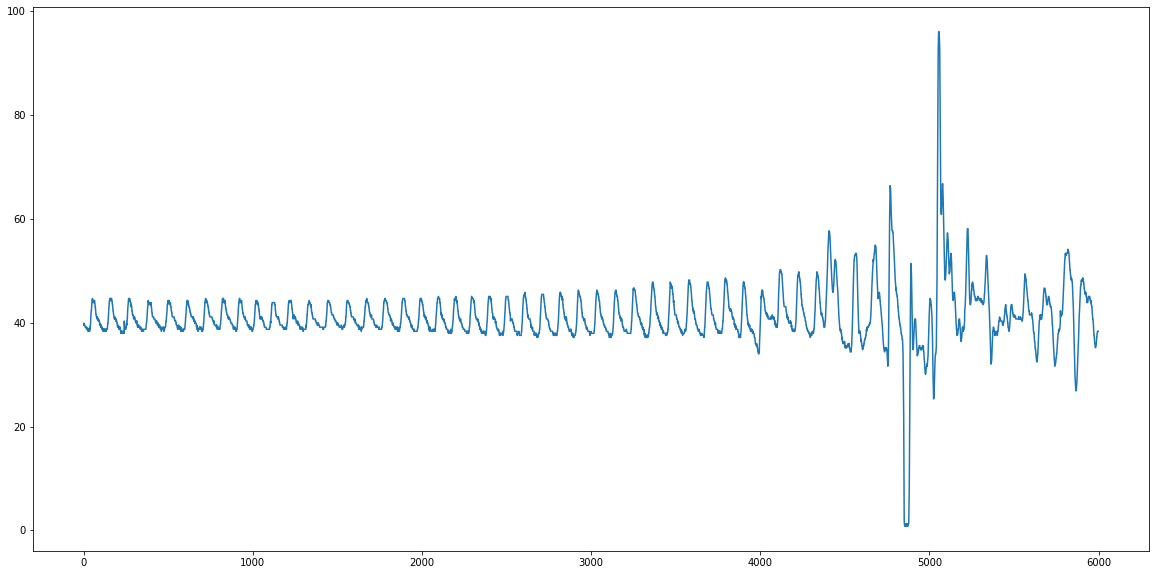

[0.984367991126399,
 0.9702396871673317,
 0.9742002338364268,
 0.9797784264665811,
 0.9793889524791041,
 0.987741826810737,
 0.9817320613642815,
 0.9703408033536357,
 0.9699866139282087,
 0.9680064899676571,
 0.9750713114005694,
 0.9694133908712879,
 0.9911791801561325,
 0.9751482973413385,
 0.9734888711431319,
 0.9801207545248919,
 0.988396732274321,
 0.980220906893324,
 0.956371226938086,
 0.8856672574608117,
 0.9842233616660729,
 0.9849817841994843,
 0.9880653495088352,
 0.9890136893794169,
 0.9932761288891397,
 0.9923396692025548,
 0.9904287979875387,
 0.9923737823258031,
 0.9927289726367149,
 0.9964565920813182,
 0.9793641544742614,
 0.9949244751256342,
 0.9915010057440804,
 0.9914352005758432,
 0.9900688769154572,
 0.9853670173372453,
 0.9689646365031652,
 0.8978103733461297,
 0.9908516345830396,
 0.4949541748246209,
 0.9231678025362194,
 0.5868699743099118,
 0.956813748436809,
 0.7047187652078355,
 0.5550882848410579,
 0.8403826811568358,
 0.8085207325345735,
 0.602489817756674,

In [58]:
# PPG
plt.figure(figsize=(20,10))
plt.plot(seg_ppg)
plt.show()

corr_ppg

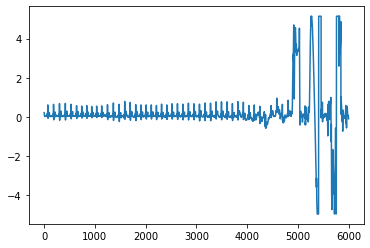

[0.8208548405715844,
 0.7935421472579829,
 0.7438409164867248,
 0.80425047462442,
 0.8094949000154135,
 0.7722855589962822,
 0.8004196101624942,
 0.8113791201916903,
 0.7938491244373561,
 0.8313928965135505,
 0.727460207840059,
 0.8211404756332494,
 0.758698709545385,
 0.6919648061656924,
 0.6987152855875413,
 0.7996069219951678,
 0.8314868150961645,
 0.8016791949729699,
 0.7959025321872977,
 0.7909129814246891,
 0.8287999525582017,
 0.7909877596491521,
 0.8536242384542043,
 0.8253990203707388,
 0.8414899295695085,
 0.8245985619671797,
 0.8037166301711326,
 0.8041330614214733,
 0.7691722221958732,
 0.767806297868252,
 0.7394860388591257,
 0.7603522092028313,
 0.788129612152147,
 0.719269744295907,
 0.8265072716821742,
 0.8190156976484699,
 0.7526085132416165,
 0.5801194689232436,
 0.4484414011232797,
 0.304350592402404,
 0.32571069105120837,
 0.7545670584550838,
 0.5860421586753016,
 0.5795407163868972,
 -0.09465287411919637,
 0.319394802933113,
 0.6124402573690532]

In [60]:
# ECG
#plt.figure(figsize=(20,10))
plt.plot(seg_ecg)
plt.show()

corr_ecg

## etc

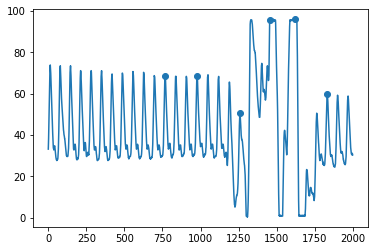

In [17]:
plt.plot(seg_ppg)
plt.scatter(idx_ppg_peak, seg_ppg[idx_ppg_peak])

In [3]:
caseid = 28
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')
vals['INTU']

array([nan, nan, nan, ..., nan, nan, nan])

In [11]:
c_vent, c_ppf, c_rftn = [], [], []

for caseid in list(vitaldb.caseids_tiva)[:]:
    filename = f'{file_path}/{caseid}.npz'
    vals = np.load(f'{file_path}/{caseid}.npz')
    
    if not np.mean(~np.isnan(vals['INTU'])):
        c_vent.append(caseid)
        
    if not np.mean(~np.isnan(vals['PPF'])):
        c_ppf.append(caseid)
        
    if not np.mean(~np.isnan(vals['RFTN'])):
        c_rftn.append(caseid)
    
print(f'c_vent: {c_vent}')
print(f'c_ppf: {c_ppf}')
print(f'c_rftn: {c_rftn}')

c_vent: [17, 20, 28, 46, 67, 75, 77, 83, 103, 104, 125, 132, 136, 158, 160, 167, 177, 181, 195, 203, 215, 236, 259, 268, 293, 295, 297, 306, 318, 332, 336, 338, 353, 354, 365, 383, 397, 435, 468, 481, 495, 513, 531, 570, 574, 584, 593, 603, 623, 624, 628, 629, 631, 634, 641, 645, 654, 661, 669, 685, 706, 716, 726, 729, 756, 777, 783, 794, 812, 819, 835, 844, 860, 869, 886, 904, 917, 922, 926, 947, 959, 972, 995, 1004, 1016, 1019, 1025, 1041, 1073, 1074, 1087, 1089, 1095, 1115, 1120, 1123, 1154, 1157, 1165, 1166, 1219, 1221, 1230, 1240, 1264, 1307, 1310, 1319, 1336, 1338, 1375, 1376, 1392, 1404, 1408, 1411, 1413, 1425, 1432, 1440, 1444, 1447, 1449, 1456, 1474, 1481, 1485, 1488, 1497, 1511, 1523, 1546, 1601, 1602, 1613, 1614, 1615, 1628, 1656, 1657, 1658, 1662, 1665, 1672, 1676, 1681, 1687, 1690, 1710, 1718, 1726, 1728, 1730, 1735, 1747, 1749, 1757, 1765, 1768, 1784, 1802, 1844, 1866, 1875, 1882, 1890, 1896, 1912, 1918, 1922, 1925, 1944, 1945, 1971, 1995, 1999, 2015, 2016, 2023, 2029, 20

In [13]:
print(len(list((vitaldb.caseids_tiva))))
print(len(c_vent))

2765
604


28
[       nan        nan        nan ... 1.21591997 1.61090004 1.21591997]
0.9987993457735485


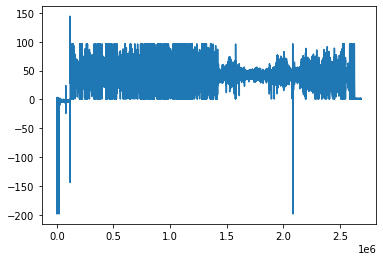

In [16]:
for caseid in list(vitaldb.caseids_tiva)[10:11]:
    filename = f'{file_path}/{caseid}.npz'
    vals = np.load(f'{file_path}/{caseid}.npz')
    
    print(caseid)
    y = vals['PPG']
    print(y)
    print(np.mean(~np.isnan(y)))
    
    plt.plot(y[~np.isnan(y)])

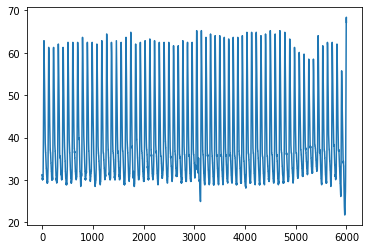

In [25]:
caseid = 3
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')

intu = vals['INTU']

t_intu = np.where(~np.isnan(intu))[0][0]


# non-event data : extract vital from previous 120s-60s from intubation
ppg = vals['PPG']
prev_ppg = ppg[t_intu-SRATE*120:t_intu-SRATE*60]

ecg = vals['ECG']
prev_ecg = ecg[t_intu-SRATE*120:t_intu-SRATE*60]

plt.plot(prev_ppg)

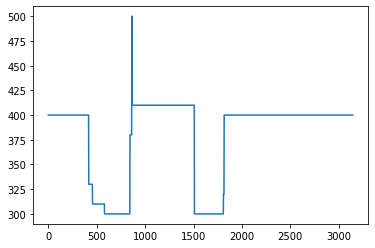

In [9]:
### FOR TESTING ###

load_val = np.load(f'{file_path}/13.npz')

#print(load_val['ECG'])
# df = pd.read_csv("https://api.vitaldb.net/cases")
# print(df)

y = load_val['INTU']

plt.plot(y[~np.isnan(y)])

In [4]:
# tracks to extract / VENT_SET_TV -> VENT_INSP_TM, SET_INSP_TM
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE"]
caseid = 373

vf = vitaldb.VitalFile(caseid, track_names)
vf.to_vital('373.vital')

AttributeError: module 'vitaldb' has no attribute 'to_vital'

## preprocessing validation (t_intu)

In [12]:
import vitaldb

# create saving folder
file_path = "input_60s"
SRATE = 100
OVERLAP = 10
LEN_INPUT = 20
n_aug = 5
    
# target patients' caseids; discarded 15 cases which don't have the index to guess intubation time 
df = pd.read_csv("https://api.vitaldb.net/cases")
caseids = (vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))
caseids = list(caseids - {1095, 1728, 2411, 2464, 2733, 3569, 3759, 4200, 4261, 4623, 4886, 5289, 5329, 5696, 6285})
    

cnt = 0
for caseid in caseids[:]:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}')
    vals = np.load(f'{file_path}/{caseid}.npz')
       
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000

        # 통증 점수 계산
        ### TSS(total surgical stimulation) = 1.57 - rftn20_ce / 3
        ### CISA(combined index of stimulus and analgesia) = stim_intensity - beta * ce + gamma, beta = 1/8, gamma = 1.5, stim_intensity = 5.5 
        rftn = vals['RFTN'][start_idx:end_idx]
        rftn = np.mean(rftn[~np.isnan(rftn)])
        if rftn <= 0:
            print(caseid)
            print(Abc)

        tss = 1.57 - rftn / 3
        if tss < 0:
            tss = 0
        cisa = 7 - rftn / 8

            

1/2684
  segment 1  segment 2  segment 3  segment 4  segment 52/2684
  segment 1  segment 2  segment 3  segment 4  segment 53/2684
  segment 1  segment 2  segment 3  segment 4  segment 54/2684
  segment 1  segment 2  segment 3  segment 4  segment 55/2684
  segment 1  segment 2  segment 3  segment 4  segment 56/2684
  segment 1  segment 2  segment 3  segment 4  segment 57/2684
  segment 1  segment 2  segment 3  segment 4  segment 58/2684
  segment 1  segment 2  segment 3  segment 4  segment 59/2684
  segment 1  segment 2  segment 3  segment 4  segment 510/2684
  segment 1  segment 2  segment 3  segment 4  segment 511/2684
  segment 1  segment 2  segment 3  segment 4  segment 512/2684
  segment 1  segment 2  segment 3  segment 4  segment 513/2684
  segment 1  segment 2  segment 3  segment 4  segment 514/2684
  segment 1  segment 2  segment 3  segment 4  segment 515/2684
  segment 1  segment 2  segment 3  segment 4  segment 516/2684
  segment 1  segment 2  segment 3  segment 4  segment 51

/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'Abc' is not defined

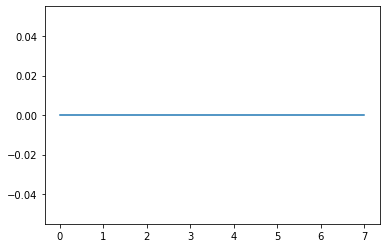

In [17]:
import matplotlib.pyplot as plt

rft = vals['RFTN']
plt.plot(rft[~np.isnan(rft)])


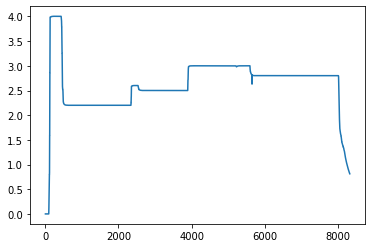

In [18]:
# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE"]

caseid = 166
vf = vitaldb.VitalFile(caseid, track_names)
vals = vf.to_numpy(track_names, interval=1/SRATE)


rft = vals[:,4]
plt.plot(rft[~np.isnan(rft)])

In [54]:
idc_intu

array([  87677,   87879,   88079, ..., 1837120, 1837320, 1837520])

In [57]:
#t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]
t_intu = 87677
idc_intu = np.where(~np.isnan(intu))[0]
idx = np.where(idc_intu==t_intu)[0][0]


prev = t_intu
switch = True
for i in range(1,16):
    if idc_intu[idx+i] - prev > 210:
        print('too far ', i)
        switch = False  
    prev = idc_intu[idx+i]

if switch:
    print('yes')

too far  4


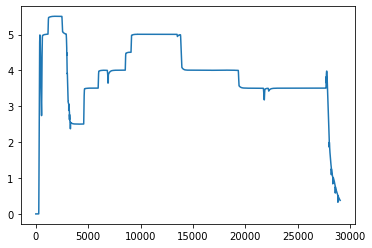

99469
99669
99868
100070
100270
100470
100670
111471


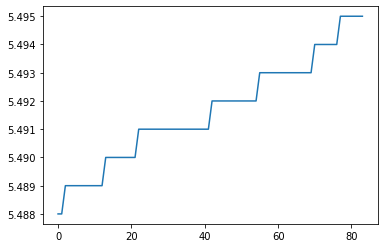

In [15]:
# create saving folder
file_path = "vital_np"
save_path = "input_60s"
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
    
caseid = 711
vals = np.load(f'{file_path}/{caseid}.npz')
    
rft = vals['RFTN']   
plt.plot(rft[~np.isnan(rft)])
plt.show()
    
# intubation time - find the first t which satisfies vent_set_tm != nan & ppf_ce != nan
t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]

intu = vals['INTU']
idc_intu = np.where(~np.isnan(intu))[0]
while True:
    # vent_insp_tm이 nan이 아닌 경우
    if not np.isnan(intu[t_intu]):
        print(t_intu)
        idx = np.where(idc_intu==t_intu)[0][0]
        prev = t_intu
        
        switch = True
        for i in range(1,16):
            if idc_intu[idx+i] - prev > 210:
                switch = False
                t_intu = t_intu + 1
            prev = idc_intu[idx+i]
        
        if switch:
            break
            
    else:
        t_intu = t_intu + 1

        
        
        
        
ppf = vals['PPF']
ppf = ppf[t_intu:t_intu + SRATE*60]

rftn = vals['RFTN']
rftn = rftn[t_intu:t_intu + SRATE*60]

plt.plot(rftn[~np.isnan(rftn)])
plt.show()


In [39]:
t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]

intu = vals['INTU']
while True:
    if not np.isnan(intu[t_intu]):
        break
    else:
        t_intu = t_intu + 1
t_intu

87677

In [4]:
np.where(~np.isnan(vals['RFTN']))[0][:100]

array([  214,   315,   414,   515,   614,   714,   815,   914,  1015,
        1116,  1215,  1314,  1415,  1516,  1615,  1716,  1815,  1916,
        2017,  2116,  2215,  2316,  2417,  2516,  2617,  2716,  2817,
        2917,  3016,  3117,  3218,  3317,  3416,  3517,  3618,  3717,
        3818,  3917,  4018,  4119,  4218,  4319,  4419,  4519,  4618,
        4718,  4818,  4918,  5019,  5118,  5219,  5320,  5419,  5518,
        5619,  5718,  5819,  5920,  6019,  6120,  6221,  6320,  6419,
        6520,  6620,  6720,  6820,  6921,  7020,  7121,  7220,  7321,
        7422,  7521,  7622,  7723,  7822,  7921,  8022,  8121,  8222,
        8322,  8422,  8522,  8623,  8722,  8822,  8922,  9023,  9122,
        9223,  9322,  9423,  9524,  9623,  9724,  9825,  9924, 10023,
       10124])

In [3]:
np.where(~np.isnan(vals['INTU']))[0][:100]

array([ 51706,  52443,  53176,  53915,  54611,  55319,  56078,  56810,
        57511,  58212,  58911,  59613,  60304,  61030,  61689,  62414,
        63089,  63790,  64513,  65217,  65932,  66613,  67314,  68031,
        68703,  69414,  70168,  70921,  71604,  72358,  73068,  73844,
        74537,  75234,  75959,  76719,  77459,  78194,  78936,  79691,
        80433,  81204,  81924,  82645,  83365,  84047,  84712,  85418,
        86114,  86805,  87505,  88195,  88894,  89583,  90236,  90895,
        91557,  92207,  92882,  93575,  94238,  94907,  95576,  96240,
        96939,  97636,  98343,  99036,  99748, 100425, 101150, 101850,
       102548, 103259, 103989, 104691, 105405, 106118, 106864, 107595,
       108309, 109061, 109774, 110495, 111196, 111910, 112619, 113361,
       114075, 114795, 115496, 116198, 116909, 117596, 118299, 118999,
       119674, 120375, 121064, 121741])

In [17]:
# vals['intu']의 간격 계산
lis = np.where(~np.isnan(vals['INTU']))[0]
l_int = [ lis[i+1] - lis[i] for i in range(len(lis)-1)]
np.sort(l_int)[::-1][:100]

array([10801,  3200,  2359,   211,   211,   211,   211,   211,   210,
         210,   210,   210,   210,   210,   210,   210,   210,   210,
         210,   210,   210,   210,   210,   210,   210,   210,   210,
         210,   210,   210,   210,   210,   210,   210,   210,   210,
         210,   210,   210,   210,   210,   210,   210,   210,   210,
         210,   210,   203,   203,   203,   203,   203,   203,   203,
         203,   203,   203,   203,   202,   202,   202,   202,   202,
         202,   202,   202,   202,   202,   202,   202,   202,   202,
         202,   202,   202,   202,   202,   202,   202,   202,   202,
         202,   202,   202,   202,   202,   202,   202,   202,   202,
         202,   202,   202,   202,   202,   202,   202,   202,   202,
         202])

In [34]:
rft = vals['RFTN'][87677:936770]
 rft[~np.isnan(rft)][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.15899999, 0.588     ,
       0.588     , 0.63200003, 0.70499998, 0.713     , 0.713     ,
       0.76099998, 0.93199998, 0.93199998, 1.00699997, 1.23800004,
       1.36300004, 1.52699995, 1.52699995, 1.55900002, 1.63999999,
       1.63999999, 1.66499996, 1.66499996, 1.70700002, 1.81200004,
       1.81200004, 1.89600003, 1.89600003, 1.93400002, 1.93400002,
       1.93400002, 1.93400002, 2.25699997, 2.35800004, 2.35800004,
       2.35800004, 2.37899995, 2.6329999 , 2.7190001 , 2.73399997,
       3.01099992, 3.08800006, 3.10599995, 3.32800007, 3.57200003,
       3.74699998, 3.86500001, 3.93400002, 3.96499991, 3.96700001,
       3.96700001, 3.96700001, 3.96700001, 3.9690001 , 3.9690001 ,
       3.9690001 , 3.9690001 , 3.9690001 , 3.9690001 , 3.9690001 ,
       3.9690001 , 3.9690001 , 3.9690001 , 3.97000003, 3.97099996,
       3.97099996, 3.97099996, 3.97099996, 3.97199988, 3.97300

In [25]:
vals[

(1959950, 87677)